# PDBe API Training

This interactive Python notebook will guide you through various ways of programmatically accessing Protein Data Bank in Europe (PDBe) data using REST API

The REST API is a programmatic way to obtain information from the PDB and EMDB. You can access details about:

* sample
* experiment
* models
* compounds
* cross-references
* publications
* quality
* assemblies
and more...
For more information, visit https://www.ebi.ac.uk/pdbe/pdbe-rest-api

# Notebook #6
This notebook is the second in the training material series, and focuses on getting information for multiple PDB entries using the REST search API of PDBe.

## 1) Making imports and setting variables
First, we import some packages that we will use, and set some variables.

Note: Full list of valid URLs is available from https://www.ebi.ac.uk/pdbe/api/doc/

In [44]:
import requests # used for getting data from a URL
from pprint import pprint # pretty print
import matplotlib.pyplot as plt # plotting results
import pandas as pd # used for turning results into tables

get_ipython().run_line_magic('matplotlib', 'inline') # allowing in-line plots

base_url = "https://www.ebi.ac.uk/pdbe/" # the beginning of the URL for PDBe's API.

api_base = base_url + "api/"

search_url = base_url + 'search/pdb/select?' # the rest of the URL used for PDBe's search API. 

## 2) a function to get data from the search API
Let's start with defining a function that can be used to GET data from the PDBe search API.


In [45]:
def make_request(search_term, number_of_rows=10):
    """
    This function can make GET requests to
    the PDBe search API
    
    :param url: String,
    :param pdb_id: String
    :return: JSON
    """
    search_variables = '&wt=json&rows={}'.format(number_of_rows)
    url = search_url+search_term+search_variables
    print(url)
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        print("[No data retrieved - %s] %s" % (response.status_code, response.text))
    
    return {}

## 3) formatting the search terms 
This will allow us to use human readable search terms and this function will make a URL that the search API can handle.

In [46]:
def format_search_terms(search_terms, filter_terms=None):
    # print('formatting search terms: %s' % search_terms)
    search_string = ''
    filter_string = ''
    search_list = []
    if isinstance(search_terms, dict):
        for key in search_terms:
            term = search_terms.get(key)
            if ' ' in term:
                if not '"' in term:
                    term = '"{}"'.format(term)
                elif not "'" in term:
                    term = "'{}'".format(term)
            search_list.append('{}:{}'.format(key, term))
        search_string = ' AND '.join(search_list)
    else:
        if '&' in search_terms:
            search_string = search_terms.replace('&', ' AND ')
        else:
            search_string = search_terms
    if filter_terms:
        filter_string = '&fl={}'.format(','.join(filter_terms))
    # print('formatted search terms: %s' % search_string)
    final_search_string = 'q={}{}'.format(search_string, filter_string)
    return final_search_string

## 4) Getting useful data out of the search

This function will run the search and will return a list of the results

In [47]:
def run_search(search_terms, filter_terms=None, number_of_rows=10):
    search_term = format_search_terms(search_terms, filter_terms)

    response = make_request(search_term, number_of_rows)
    return response.get('response', {}).get('docs', [])
    

## 5) running a search

Now we are ready to actually run a search against the PDB API for entries containing human Dihydrofolate reductase in the PDB. This will return a list of results - only 10 to start with.

A list of search terms is available at:
https://www.ebi.ac.uk/pdbe/api/doc/search

This will return details of human Dihydrofolate reductase's in the PDB

The search terms are defined as a dictionary (a hash in other programming lanuguages). 
e.g. 
{"molecule_name":"Dihydrofolate reductase"}
Here we are searching for molecules named Dihydrofolate reductase.
If we search for two terms i.e. molecule_name and organism_scientific_name then we will get molecules that match both search terms.

It will return the number of results for two searches.

In [48]:
print('1st search')
search_terms = {"molecule_name":"Dihydrofolate reductase"} 

results = run_search(search_terms)
print('Number of results for {}: {}'.format(','.join(search_terms.values()), len(results)))

1st search
https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:"Dihydrofolate reductase"&wt=json&rows=10
Number of results for Dihydrofolate reductase: 10


In [49]:
print('2nd search')
search_terms = {"molecule_name":"Dihydrofolate reductase",
                "organism_name":"Human"
               } 
results = run_search(search_terms)
print('Number of results for {}: {}'.format(','.join(search_terms.values()), len(results)))

2nd search
https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:"Dihydrofolate reductase" AND organism_name:Human&wt=json&rows=10
Number of results for Dihydrofolate reductase,Human: 10


We will then look at the last result.
We will print the data we have for the first result.

This will be the first item of the list "results"
i.e. results[0]

We are using "pprint" (pretty print) rather than "print" to make the result easier to read.

In [50]:
pprint(results[0])

{'_version_': 1642211156279951360,
 'abstracttext_unassigned': ['To understand the role of specific active site '
                             'residues in conferring selective dihydrofolate '
                             'reductase (DHFR) inhibition from pathogenic '
                             'organisms such as Pneumocystis carinii (pc) or '
                             'Pneumocystis jirovecii (pj), the causative agent '
                             'in AIDS pneumonia, it is necessary to evaluate '
                             'the role of these residues in the human enzyme. '
                             'We report the first kinetic parameters for DHFR '
                             'from pjDHFR and pcDHFR with methotrexate (MTX), '
                             'trimethoprim (TMP), and its potent analogue, '
                             'PY957. We also report the mutagenesis and '
                             'kinetic analysis of active site mutant proteins '
                     

 'q_all_assembly_type': ['monomer'],
 'q_all_authors': ['Cody V',
                   'Makin J',
                   'Pace J',
                   'Piraino J',
                   'Queener SF',
                   'Rosowsky A'],
 'q_all_compound_names': ['NDP : NADPH '
                          'DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE PHOSPHATE',
                          'DH1 : '
                          '2,4-DIAMINO-5-[2-METHOXY-5-(4-CARBOXYBUTYLOXY)BENZYL]PYRIMIDINE',
                          'DH1 : '
                          '5-{3-[(2,4-diaminopyrimidin-5-yl)methyl]-4-methoxyphenoxy}pentanoic '
                          'acid',
                          'DH1 : '
                          '5-[3-[(2,4-diaminopyrimidin-5-yl)methyl]-4-methoxy-phenoxy]pentanoic '
                          'acid',
                          'NDP : '
                          '[[(2R,3S,4R,5R)-5-(3-aminocarbonyl-4H-pyridin-1-yl)-3,4-dihydroxy-oxolan-2-yl]methoxy-hydroxy-phosphoryl] '
                       

 'unp_count': 1,
 'unp_nf90_accession': ['A0A2K5VUB7',
                        'B0YJ76',
                        'A0A2J8UWT6',
                        'A0A096ND17',
                        'A0A2K5XC43',
                        'A0A0D9RRI0',
                        'H9YW18',
                        'P00374',
                        'A0A2K5NPX9',
                        'A0A024RAQ3',
                        'A0A2J8UWS1',
                        'S5WD14',
                        'S5VM81',
                        'A0A2I2Z6I4',
                        'A0A2K6C3X6'],
 'unp_nf90_id': ['A0A2K5VUB7_MACFA',
                 'B0YJ76_HUMAN',
                 'A0A2J8UWT6_PONAB',
                 'A0A096ND17_PAPAN',
                 'A0A2K5XC43_MANLE',
                 'A0A0D9RRI0_CHLSB',
                 'H9YW18_MACMU',
                 'DYR_HUMAN',
                 'A0A2K5NPX9_CERAT',
                 'A0A024RAQ3_HUMAN',
                 'A0A2J8UWS1_PONAB',
                 'S5WD14_SHISS',
       

As you can see we get lots of data back about the individual molecule we have searched for and the PDB entries in which it is contained. 

We can get the PDB ID and experimental method for this first row as follows.

In [51]:
print(results[0].get('pdb_id'))
print(results[0].get('experimental_method'))

3fs6
['X-ray diffraction']


We can restrict the results to only the information we want using a filter so its easier to see the information we want.

In [52]:
print('3rd search')
search_terms = {"molecule_name":"Dihydrofolate reductase",
                "organism_name":"Human"
               }
filter_terms = ['pdb_id', 'experimental_method']
results = run_search(search_terms, filter_terms)
pprint(results)

3rd search
https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:"Dihydrofolate reductase" AND organism_name:Human&fl=pdb_id,experimental_method&wt=json&rows=10
[{'experimental_method': ['X-ray diffraction'], 'pdb_id': '3fs6'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '2dhf'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '3nxr'},
 {'experimental_method': ['Solution NMR'], 'pdb_id': '1yho'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '5hqy'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '5hqz'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '3l3r'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '5hvb'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '1hfq'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '1hfp'}]


## 6) Analysing and plotting the results


We are going to use a Python package called Pandas to help us sort and visualise the results


First we have to do a bit of housekeeping, some of the results are lists (a PDB entry can have more than one experimental method or organism for example) so we need to change them into strings so we can use them in a graph

In [79]:
def change_lists_to_strings(results):
    """
    input - list of results from search
    output - list of results with lists changed into strings
    """
    for row in results:
        for data in row:
            if type(row[data]) == list:
                # if there are any numbers in the list change them into strings
                row[data] = [str(a) for a in row[data]]
                # unique and sort the list and then change the list into a string
                row[data] = ','.join(sorted(list(set(row[data]))))
                
    return results

In [80]:
results = change_lists_to_strings(results)
pprint(results)

[{'_version_': 1642211156279951360,
  'abstracttext_unassigned': 'To understand the role of specific active site '
                             'residues in conferring selective dihydrofolate '
                             'reductase (DHFR) inhibition from pathogenic '
                             'organisms such as Pneumocystis carinii (pc) or '
                             'Pneumocystis jirovecii (pj), the causative agent '
                             'in AIDS pneumonia, it is necessary to evaluate '
                             'the role of these residues in the human enzyme. '
                             'We report the first kinetic parameters for DHFR '
                             'from pjDHFR and pcDHFR with methotrexate (MTX), '
                             'trimethoprim (TMP), and its potent analogue, '
                             'PY957. We also report the mutagenesis and '
                             'kinetic analysis of active site mutant proteins '
                    

  'q_number_of_copies': 1,
  'q_number_of_models': 1,
  'q_number_of_polymer_entities': 1,
  'q_number_of_polymer_residues': 187,
  'q_number_of_polymers': 1,
  'q_number_of_protein_chains': 1,
  'q_organism_name': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                     'Sapiens,Homo Sapiens (Human),Homo '
                     'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'q_organism_scientific_name': 'Homo sapiens',
  'q_organism_synonyms': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                         'Sapiens,Homo Sapiens (Human),Homo '
                         'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'q_overall_quality': 4.0,
  'q_pdb_accession': '3fs6',
  'q_pdb_format_compatible': 'Y',
  'q_pdb_id': '3fs6',
  'q_percent_solvent': 50.56,
  'q_pfam': 'PF00186 : DHFR_1',
  'q_pfam_accession': 'PF00186',
  'q_pfam_clan': 'CL0387 : DHFred',
  'q_pfam_clan_name': 'DHFred',
  'q_pfam_description': 'Dihydrofolate reductase',
  'q_pfam_name': 'DHF

  'scop_fold': 'Dihydrofolate reductase-like',
  'scop_superfamily': 'Dihydrofolate reductase-like',
  'seq_100_cluster_number': '20333',
  'seq_100_cluster_rank': 58,
  'seq_30_cluster_number': '28920',
  'seq_30_cluster_rank': 85,
  'seq_50_cluster_number': '31752',
  'seq_50_cluster_rank': 85,
  'seq_70_cluster_number': '40073',
  'seq_70_cluster_rank': 85,
  'seq_90_cluster_number': '20598',
  'seq_90_cluster_rank': 77,
  'seq_95_cluster_number': '61462',
  'seq_95_cluster_rank': 71,
  'spacegroup': 'P 1',
  'status': 'REL',
  'struct_asym_id': 'A,B',
  'superkingdom': 'Eukaryota',
  't_abstracttext_unassigned': 'The 2.3-A crystal structure of recombinant '
                               'human dihydrofolate reductase (EC 1.5.1.3, '
                               'DHFR) has been solved as a binary complex with '
                               'folate (a poor substrate at neutral pH) and '
                               'also as a binary complex with an inhibitor, '
                

                  'Tertiary,Pyrimidines,Stereoisomerism,Tetrahydrofolate '
                  'Dehydrogenase',
  'q_model_quality': 36.47,
  'q_modified_residue_flag': 'N',
  'q_molecule_name': 'Dihydrofolate reductase',
  'q_molecule_sequence': 'VGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQNLVIMGKKTWFSIPEKNRPLKGRINLVLSRELKEPPQGAHFLSRSLDDALKLTEQPELANKVDMVWIVGGSSVYKEAMNHPGHLKLFVTRIMQDFESDTFFPEIDLEKYKLLPEYPGVLSDVQEEKGIKYKFEVYEKND',
  'q_molecule_synonym': 'Dihydrofolate reductase',
  'q_molecule_type': 'Protein',
  'q_mutation': 'n',
  'q_nigli_cell_a': 55.302,
  'q_nigli_cell_alpha': 99.633,
  'q_nigli_cell_b': 55.302,
  'q_nigli_cell_beta': 99.633,
  'q_nigli_cell_c': 55.302,
  'q_nigli_cell_gamma': 99.633,
  'q_nigli_cell_symmetry': 'R32',
  'q_num_interacting_entity_id': '0',
  'q_num_r_free_reflections': '2302',
  'q_number_of_bound_entities': 3,
  'q_number_of_bound_molecules': 6,
  'q_number_of_copies': 1,
  'q_number_of_models': 1,
  'q_number_of_polymer_entities': 1,
  'q_numbe

                        'process,folic acid metabolic process,negative '
                        'regulation of translation,one-carbon metabolic '
                        'process,oxidation-reduction process,positive '
                        'regulation of nitric-oxide synthase '
                        'activity,regulation of removal of superoxide '
                        'radicals,regulation of transcription involved in G1/S '
                        'transition of mitotic cell cycle,response to '
                        'methotrexate,tetrahydrobiopterin biosynthetic '
                        'process,tetrahydrofolate biosynthetic '
                        'process,tetrahydrofolate metabolic process',
  'bound_compound_id': 'NDP,TRR',
  'bound_compound_name': 'NDP : NADPH '
                         'DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                         'PHOSPHATE,TRR : '
                         '2,4-DIAMINO-5-(3,4,5-TRIMETHOXY-BENZYL)-PYRIMIDIN-1-IUM',
  'bound_comp

  'cath_homologous_superfamily': 'Dihydrofolate Reductase, subunit A',
  'cath_topology': 'Dihydrofolate Reductase, subunit A',
  'cell_a': 86.516,
  'cell_alpha': 90.0,
  'cell_b': 86.516,
  'cell_beta': 90.0,
  'cell_c': 76.647,
  'cell_gamma': 120.0,
  'citation_authors': 'Cody V,Gangjee A',
  'citation_title': 'Human dihydrofolate reductase ternary complex with a '
                    'series of fluorine substituted '
                    '5-methyl-6-phenythio)thieno[2,3-d]pyrimidine-2,4-diamines',
  'cofactor_class': 'Nicotinamide-adenine dinucleotide',
  'cofactor_id': 'NDP',
  'compound_id': '63Y,NDP',
  'compound_name': '63Y : '
                   '5-methyl-6-[(2,3,4-trifluorophenyl)sulfanyl]thieno[2,3-d]pyrimidine-2,4-diamine,NDP '
                   ': NADPH DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                   'PHOSPHATE',
  'compound_systematic_name': '63Y : '
                              '5-methyl-6-[(2,3,4-trifluorophenyl)sulfanyl]thieno[2,3-d]pyrimidine-2,4-diam

  'q_nigli_cell_symmetry': 'R32',
  'q_num_interacting_entity_id': '0',
  'q_num_r_free_reflections': '1805',
  'q_number_of_bound_entities': 2,
  'q_number_of_bound_molecules': 3,
  'q_number_of_copies': 1,
  'q_number_of_models': 1,
  'q_number_of_polymer_entities': 1,
  'q_number_of_polymer_residues': 186,
  'q_number_of_polymers': 1,
  'q_number_of_protein_chains': 1,
  'q_organism_name': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                     'Sapiens,Homo Sapiens (Human),Homo '
                     'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'q_organism_scientific_name': 'Homo sapiens',
  'q_organism_synonyms': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                         'Sapiens,Homo Sapiens (Human),Homo '
                         'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'q_overall_quality': 3.0,
  'q_pdb_accession': '5hqy',
  'q_pdb_format_compatible': 'Y',
  'q_pdb_id': '5hqy',
  'q_percent_solvent': 52.43,
  'q_pfam': 'PF00186 : D

  'pdb_id': '5hqz',
  'percent_solvent': 50.72,
  'pfam': 'PF00186 : DHFR_1',
  'pfam_accession': 'PF00186',
  'pfam_clan': 'CL0387 : DHFred',
  'pfam_clan_name': 'DHFred',
  'pfam_description': 'Dihydrofolate reductase',
  'pfam_name': 'DHFR_1',
  'pivot_resolution': 1.46,
  'plasmid_name': 'pds5',
  'polymer_length': 186,
  'prefered_assembly_id': '1',
  'primary_wavelength': 0.975,
  'processing_site': 'RCSB',
  'q_all_assembly_composition': 'protein structure',
  'q_all_assembly_form': 'homo',
  'q_all_assembly_id': '1',
  'q_all_assembly_mol_wt': '22.485',
  'q_all_assembly_type': 'monomer',
  'q_all_authors': 'Cody V,Gangjee A',
  'q_all_compound_names': '64J : '
                          '5-methyl-6-[4-(trifluoromethyloxy)phenyl]sulfanyl-thieno[2,3-d]pyrimidine-2,4-diamine,64J '
                          ': '
                          '5-methyl-6-{[4-(trifluoromethoxy)phenyl]sulfanyl}thieno[2,3-d]pyrimidine-2,4-diamine,NDP '
                          ': NADPH DIHYDRO-NICOTINAMID

 {'_version_': 1642215320965873664,
  'abstracttext_unassigned': 'A major concern of immunocompromised patients, '
                             'in particular those with AIDS, is susceptibility '
                             'to infection caused by opportunistic pathogens '
                             'such as Pneumocystis jirovecii, which is a '
                             'leading cause of pneumonia in immunocompromised '
                             'patients. We report the first kinetic and '
                             'structural data for '
                             "2,4-diamino-6-[(2',5'-dichloro "
                             'anilino)methyl]pyrido[2,3-d]pyrimidine '
                             '(OAAG324), a potent inhibitor of dihydrofolate '
                             'reductase (DHFR) from P. jirovecii (pjDHFR), and '
                             'also for trimethoprim (TMP) and methotrexate '
                             '(MTX) with pjDHFR, Pneumocystis carinii DHF

  'q_revision_year': 2017,
  'q_sample_preparation_method': 'Engineered',
  'q_seq_100_cluster_number': '34840',
  'q_seq_100_cluster_rank': 3,
  'q_seq_30_cluster_number': '28920',
  'q_seq_30_cluster_rank': 50,
  'q_seq_50_cluster_number': '31752',
  'q_seq_50_cluster_rank': 50,
  'q_seq_70_cluster_number': '40073',
  'q_seq_70_cluster_rank': 50,
  'q_seq_90_cluster_number': '20598',
  'q_seq_90_cluster_rank': 45,
  'q_seq_95_cluster_number': '61462',
  'q_seq_95_cluster_rank': 39,
  'q_spacegroup': 'H 3',
  'q_status': 'REL',
  'q_struct_asym_id': 'A',
  'q_structure_determination_method': 'MOLECULAR REPLACEMENT',
  'q_structure_solution_software': 'MOLREP',
  'q_superkingdom': 'Eukaryota',
  'q_tax_id': '9606',
  'q_tax_query': '9606',
  'q_title': 'Structural, Computational and Kinetic Data for Antifolate '
             'Interactions Against Pneumocystis jirovecii, Pneumocystis '
             'carinii and Human Dihydrofolate Reductase and Their Active Site '
             'Mutants'

  'q_all_num_interacting_entity_id': '0',
  'q_all_sequence_family': 'CL0387 : DHFred,IPR001796 : Dihydrofolate '
                           'reductase domain,IPR017925 : Dihydrofolate '
                           'reductase conserved site,IPR024072 : Dihydrofolate '
                           'reductase-like domain superfamily,PF00186 : DHFR_1',
  'q_all_structure_family': '3-Layer(aba) Sandwich,3.40.430.10,Alpha '
                            'Beta,Dihydrofolate Reductase, subunit A',
  'q_assembly_composition': 'protein structure',
  'q_assembly_form': 'homo',
  'q_assembly_id': '1',
  'q_assembly_mol_wt': 22.451,
  'q_assembly_type': 'monomer',
  'q_beam_source_name': 'Synchrotron',
  'q_biological_cell_component': 'cytoplasm,cytosol,mitochondrion',
  'q_biological_function': 'NADP binding,NADPH binding,RNA '
                           'binding,dihydrofolate reductase activity,drug '
                           'binding,folic acid binding,mRNA '
                           'binding,me

  'enzyme_name': 'Dihydrofolate reductase',
  'enzyme_num_name': '1.5.1.3 : Dihydrofolate reductase',
  'enzyme_systematic_name': '5,6,7,8-tetrahydrofolate:NADP(+) oxidoreductase',
  'experimental_method': 'X-ray diffraction',
  'expression_host_sci_name': 'Escherichia coli',
  'expression_host_strain': 'JM107, F31S MUTANT',
  'expression_host_synonyms': 'Bacillus Coli,Bacteria,Bacterium 10a,Bacterium '
                              'Coli,Bacterium Coli Commune,Bacterium E3,E. '
                              'Coli,Ecolx,Enterobacterales,Enterobacteriaceae,Enterococcus '
                              'Coli,Escherichia,Escherichia Coli,Escherichia '
                              'Sp. 3_2_53faa,Escherichia Sp. Mar,Escherichia '
                              'coli,Escherichia/Shigella '
                              'Coli,Gammaproteobacteria,Proteobacteria',
  'expression_host_tax_id': '562',
  'expression_organism_name': 'Bacillus Coli,Bacteria,Bacterium 10a,Bacterium '
                  

                               'Structural data for the Phe-31 variants, along '
                               'with wild type hDHFR, provide the first direct '
                               'comparison of the binding interactions of a '
                               'single antifolate in a family of variant '
                               'hDHFR. These ternary hDHFR complexes '
                               'crystallize in the rhombohedral space group '
                               'R3, isomorphous to that reported for wild type '
                               'hDHFR MTXO-NADPH ternary complex. MTXO binds '
                               'with its 2,4-diaminofuropyrimidine ring '
                               'interacting with Glu-30 in hDHFR. The greatest '
                               'change on modification of the side chain at '
                               'position 31 is loss of hydrophobic contacts to '
                               'the inhibitor, which results i

  'abstracttext_unassigned': 'The novel furopyrimidine, '
                             'N-[4-[(2,4-diaminofuro[2,3-d]pyrimidin-5-yl)-methyl]-methylamino] '
                             '-benzoyl]-L-glutamate (MTXO), a classical '
                             'antifolate with weak antitumor activity compared '
                             'with methotrexate (MTX), has been studied as '
                             'inhibitorcofactor ternary crystal complexes with '
                             'recombinant Phe-31 to Ser (F31S) and Phe-31 to '
                             'Gly (F31G) variant human dihydrofolate reductase '
                             '(hDHFR). Kinetic data show that the binding '
                             'affinity of MTXO is significantly weaker for the '
                             'variant hDHFR enzyme than for the wild type '
                             'enzyme. Structural data for the Phe-31 variants, '
                             'along with wild type hDHFR,

                                'hydrogen phosphate',
  'q_compound_weight': '442.425,745.421',
  'q_data_quality': -1.0,
  'q_data_reduction_software': 'R-AXIS',
  'q_deposition_date': '1997-11-04T01:00:00Z',
  'q_deposition_year': 1997,
  'q_detector': 'Image plate',
  'q_detector_type': 'RIGAKU RAXIS',
  'q_diffraction_wavelengths': '1.5418',
  'q_ec_hierarchy_name': 'Acting on the CH-NH group of donors,Dihydrofolate '
                         'reductase,Oxidoreductases,With NAD(+) or NADP(+) as '
                         'acceptor',
  'q_ec_number': '1.5.1.3',
  'q_entity_id': 1,
  'q_entity_weight': 21349.525,
  'q_entry_author_list': 'Cody V, Galitsky N, Luft JR, Pangborn W, Blakley RL, '
                         'Gangjee A',
  'q_entry_authors': 'Blakley RL,Cody V,Galitsky N,Gangjee A,Luft JR,Pangborn '
                     'W',
  'q_entry_lig_entity': '1hfr_MOT_3,1hfr_NDP_2',
  'q_enzyme_name': 'Dihydrofolate reductase',
  'q_enzyme_num_name': '1.5.1.3 : Dihydrofolate reductase

  'cath_architecture': '3-Layer(aba) Sandwich',
  'cath_class': 'Alpha Beta',
  'cath_code': '3.40.430.10',
  'cath_homologous_superfamily': 'Dihydrofolate Reductase, subunit A',
  'cath_topology': 'Dihydrofolate Reductase, subunit A',
  'cell_a': 87.496,
  'cell_alpha': 90.0,
  'cell_b': 87.496,
  'cell_beta': 90.0,
  'cell_c': 76.733,
  'cell_gamma': 120.0,
  'citation_authors': 'Appleman JR,Blakley RL,Chunduru SK,Cody V,Galitsky '
                      'N,Lewis WS,Luft JR,Pangborn W,Spencer HT',
  'citation_doi': '10.1074/jbc.270.10.5057',
  'citation_title': 'Methotrexate-resistant variants of human dihydrofolate '
                    'reductase with substitutions of leucine 22. Kinetics, '
                    'crystallography, and potential as selectable markers.',
  'citation_year': 1995,
  'cofactor_class': 'Nicotinamide-adenine dinucleotide',
  'cofactor_id': 'NDP',
  'compound_id': 'MTX,NDP',
  'compound_name': 'MTX : METHOTREXATE,NDP : NADPH '
                   'DIHYDRO-NICO

  'all_assembly_mol_wt': '22.363',
  'all_assembly_type': 'monomer',
  'all_authors': 'Cody V,Galitsky N,Gangjee A,Kisliuk RL,Li R,Luft JR,Pangborn '
                 'W,Queener SF,Vasudevan A,Vidwans AP',
  'all_compound_names': 'NDP : NADPH DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                        'PHOSPHATE,NDP : '
                        '[[(2R,3S,4R,5R)-5-(3-aminocarbonyl-4H-pyridin-1-yl)-3,4-dihydroxy-oxolan-2-yl]methoxy-hydroxy-phosphoryl] '
                        '[(2R,3R,4R,5R)-5-(6-aminopurin-9-yl)-3-hydroxy-4-phosphonooxy-oxolan-2-yl]methyl '
                        'hydrogen phosphate,PRD : '
                        'N6-(2,5-DIMETHOXY-BENZYL)-N6-METHYL-PYRIDO[2,3-D]PYRIMIDINE-2,4,6-TRIAMINE,PRD '
                        ': '
                        'N6-[(2,5-dimethoxyphenyl)methyl]-N6-methyl-pyrido[5,6-e]pyrimidine-2,4,6-triamine,PRD '
                        ': '
                        'N~6~-(2,5-dimethoxybenzyl)-N~6~-methylpyrido[2,3-d]pyrimidine-2,4,6-triamin

  'q_seq_100_cluster_number': '87523',
  'q_seq_100_cluster_rank': 1,
  'q_seq_30_cluster_number': '28920',
  'q_seq_30_cluster_rank': 91,
  'q_seq_50_cluster_number': '31752',
  'q_seq_50_cluster_rank': 91,
  'q_seq_70_cluster_number': '40073',
  'q_seq_70_cluster_rank': 91,
  'q_seq_90_cluster_number': '20598',
  'q_seq_90_cluster_rank': 83,
  'q_seq_95_cluster_number': '61462',
  'q_seq_95_cluster_rank': 77,
  'q_spacegroup': 'H 3',
  'q_status': 'REL',
  'q_struct_asym_id': 'A',
  'q_structure_determination_method': 'MOLECULAR REPLACEMENT',
  'q_superkingdom': 'Eukaryota',
  'q_tax_id': '9606',
  'q_tax_query': '9606',
  'q_title': 'STRUCTURE-BASED DESIGN AND SYNTHESIS OF LIPOPHILIC '
             '2,4-DIAMINO-6-SUBSTITUTED QUINAZOLINES AND THEIR EVALUATION AS '
             'INHIBITORS OF DIHYDROFOLATE REDUCTASE AND POTENTIAL ANTITUMOR '
             'AGENTS',
  'q_uniprot': 'P00374 : DYR_HUMAN',
  'q_uniprot_accession': 'P00374,P00374-2',
  'q_uniprot_accession_best': 'P00374-2',

                          'DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                          'PHOSPHATE,NDP : '
                          '[[(2R,3S,4R,5R)-5-(3-aminocarbonyl-4H-pyridin-1-yl)-3,4-dihydroxy-oxolan-2-yl]methoxy-hydroxy-phosphoryl] '
                          '[(2R,3R,4R,5R)-5-(6-aminopurin-9-yl)-3-hydroxy-4-phosphonooxy-oxolan-2-yl]methyl '
                          'hydrogen phosphate,SO4 : SULFATE ION,SO4 : sulfate',
  'q_all_enzyme_names': '1.5.1.3 : Dihydrofolate '
                        'reductase,5,6,7,8-tetrahydrofolate:NADP(+) '
                        'oxidoreductase,Acting on the CH-NH group of '
                        'donors,Dihydrofolate reductase,Oxidoreductases,With '
                        'NAD(+) or NADP(+) as acceptor',
  'q_all_go_terms': 'NADP binding,NADPH binding,RNA binding,axon '
                    'regeneration,cytoplasm,cytosol,dihydrofolate metabolic '
                    'process,dihydrofolate reductase activity,drug '
                 

  'uniprot_id': 'DYR_HUMAN',
  'uniprot_id_best': 'DYR_HUMAN',
  'uniprot_non_canonical': 'P00374-2 : DYR_HUMAN',
  'unp_count': 1,
  'unp_nf90_accession': 'A0A024RAQ3,A0A096ND17,A0A0D9RRI0,A0A2I2Z6I4,A0A2J8UWS1,A0A2J8UWT6,A0A2K5NPX9,A0A2K5VUB7,A0A2K5XC43,A0A2K6C3X6,B0YJ76,H9YW18,P00374,S5VM81,S5WD14',
  'unp_nf90_id': 'A0A024RAQ3_HUMAN,A0A096ND17_PAPAN,A0A0D9RRI0_CHLSB,A0A2I2Z6I4_GORGO,A0A2J8UWS1_PONAB,A0A2J8UWT6_PONAB,A0A2K5NPX9_CERAT,A0A2K5VUB7_MACFA,A0A2K5XC43_MANLE,A0A2K6C3X6_MACNE,B0YJ76_HUMAN,DYR_HUMAN,H9YW18_MACMU,S5VM81_ECO57,S5WD14_SHISS',
  'unp_nf90_organism': 'Cercocebus atys (Sooty mangabey) (Cercocebus torquatus '
                       'atys),Chlorocebus sabaeus (Green monkey) '
                       '(Cercopithecus sabaeus),Escherichia coli '
                       'O157:H7,Gorilla gorilla gorilla (Western lowland '
                       'gorilla),Homo sapiens (Human),Macaca fascicularis '
                       '(Crab-eating macaque) (Cynomolgus monkey),Macaca '
   

  'q_diffraction_protocol': 'Single wavelength',
  'q_diffraction_source_type': 'SSRL BEAMLINE BL7-1',
  'q_diffraction_wavelengths': '1.08',
  'q_ec_hierarchy_name': 'Acting on the CH-NH group of donors,Dihydrofolate '
                         'reductase,Oxidoreductases,With NAD(+) or NADP(+) as '
                         'acceptor',
  'q_ec_number': '1.5.1.3',
  'q_entity_id': 1,
  'q_entity_weight': 21349.525,
  'q_entry_author_list': 'Klon AE, Heroux A, Ross LJ, Pathak V, Johnson CA, '
                         'Piper JR, Borhani DW',
  'q_entry_authors': 'Borhani DW,Heroux A,Johnson CA,Klon AE,Pathak V,Piper '
                     'JR,Ross LJ',
  'q_entry_lig_entity': '1kms_LIH_3,1kms_NDP_4,1kms_SO4_2',
  'q_enzyme_name': 'Dihydrofolate reductase',
  'q_enzyme_num_name': '1.5.1.3 : Dihydrofolate reductase',
  'q_enzyme_systematic_name': '5,6,7,8-tetrahydrofolate:NADP(+) oxidoreductase',
  'q_experiment_data_available': 'y',
  'q_experimental_method': 'X-ray diffraction',
  'q_expre

                  'activity,GO:0005542 : folic acid binding,GO:0005737 : '
                  'cytoplasm,GO:0005739 : mitochondrion,GO:0005829 : '
                  'cytosol,GO:0006729 : tetrahydrobiopterin biosynthetic '
                  'process,GO:0006730 : one-carbon metabolic '
                  'process,GO:0008144 : drug binding,GO:0016491 : '
                  'oxidoreductase activity,GO:0017148 : negative regulation of '
                  'translation,GO:0031103 : axon regeneration,GO:0031427 : '
                  'response to methotrexate,GO:0046452 : dihydrofolate '
                  'metabolic process,GO:0046653 : tetrahydrofolate metabolic '
                  'process,GO:0046654 : tetrahydrofolate biosynthetic '
                  'process,GO:0046655 : folic acid metabolic '
                  'process,GO:0050661 : NADP binding,GO:0051000 : positive '
                  'regulation of nitric-oxide synthase activity,GO:0051870 : '
                  'methotrexate binding,GO:0055

                  'process,tetrahydrofolate metabolic process,translation '
                  'repressor activity, mRNA regulatory element binding',
  'all_molecule_names': 'Dihydrofolate reductase',
  'all_num_interacting_entity_id': '0',
  'all_sequence_family': 'CL0387 : DHFred,IPR001796 : Dihydrofolate reductase '
                         'domain,IPR017925 : Dihydrofolate reductase conserved '
                         'site,IPR024072 : Dihydrofolate reductase-like domain '
                         'superfamily,PF00186 : DHFR_1',
  'all_structure_family': '3-Layer(aba) Sandwich,3.40.430.10,Alpha Beta,Alpha '
                          'and beta proteins (a/b),Dihydrofolate Reductase, '
                          'subunit A,Dihydrofolate '
                          'reductase-like,Dihydrofolate reductases',
  'assembly_composition': 'protein structure',
  'assembly_form': 'homo',
  'assembly_id': '1',
  'assembly_mol_wt': 21.935,
  'assembly_type': 'monomer',
  'beam_source_name': 'Rot

  'diffraction_wavelengths': '1.5418,1.5621,1.7321',
  'ec_hierarchy_name': 'Acting on the CH-NH group of donors,Dihydrofolate '
                       'reductase,Oxidoreductases,With NAD(+) or NADP(+) as '
                       'acceptor',
  'ec_number': '1.5.1.3',
  'entity_id': 1,
  'entity_weight': 21349.525,
  'entry_author_list': 'Cody V, Luft JR, Pangborn W, Gangjee A, Queener SF',
  'entry_authors': 'Cody V,Gangjee A,Luft JR,Pangborn W,Queener SF',
  'entry_entity': '1s3w_1',
  'entry_lig_entity': '1s3w_NAP_2,1s3w_TQT_3',
  'entry_organism_scientific_name': 'Homo sapiens|9606',
  'enzyme_name': 'Dihydrofolate reductase',
  'enzyme_num_name': '1.5.1.3 : Dihydrofolate reductase',
  'enzyme_systematic_name': '5,6,7,8-tetrahydrofolate:NADP(+) oxidoreductase',
  'experiment_data_available': 'y',
  'experimental_method': 'X-ray diffraction',
  'expression_host_sci_name': 'Escherichia coli',
  'expression_host_synonyms': 'Bacillus Coli,Bacteria,Bacterium 10a,Bacterium '
             

  'crystallisation_temperature': 298.0,
  'data_quality': 18.6,
  'data_reduction_software': 'DENZO',
  'data_scaling_software': 'SCALEPACK',
  'deposition_date': '2002-09-26T01:00:00Z',
  'deposition_site': 'RCSB',
  'deposition_year': 2002,
  'detector': 'Image plate',
  'detector_type': 'RIGAKU RAXIS IV',
  'diffraction_protocol': 'Single wavelength',
  'diffraction_source_type': 'RIGAKU RU200',
  'diffraction_wavelengths': '1.5418',
  'ec_hierarchy_name': 'Acting on the CH-NH group of donors,Dihydrofolate '
                       'reductase,Oxidoreductases,With NAD(+) or NADP(+) as '
                       'acceptor',
  'ec_number': '1.5.1.3',
  'entity_id': 1,
  'entity_weight': 21480.723,
  'entry_author_list': 'Cody V, Galitsky N, Luft JR, Pangborn WA, Gangjee A',
  'entry_authors': 'Cody V,Galitsky N,Gangjee A,Luft JR,Pangborn WA',
  'entry_entity': '1mvt_1',
  'entry_lig_entity': '1mvt_DTM_3,1mvt_SO4_2',
  'entry_organism_scientific_name': 'Homo sapiens|9606',
  'enzyme_name':

  'q_uniprot_id_best': 'DYR_HUMAN',
  'q_uniprot_non_canonical': 'P00374-2 : DYR_HUMAN',
  'q_unp_count': 1,
  'q_unp_nf90_accession': 'A0A024RAQ3,A0A096ND17,A0A0D9RRI0,A0A2I2Z6I4,A0A2J8UWS1,A0A2J8UWT6,A0A2K5NPX9,A0A2K5VUB7,A0A2K5XC43,A0A2K6C3X6,B0YJ76,H9YW18,P00374,S5VM81,S5WD14',
  'q_unp_nf90_id': 'A0A024RAQ3_HUMAN,A0A096ND17_PAPAN,A0A0D9RRI0_CHLSB,A0A2I2Z6I4_GORGO,A0A2J8UWS1_PONAB,A0A2J8UWT6_PONAB,A0A2K5NPX9_CERAT,A0A2K5VUB7_MACFA,A0A2K5XC43_MANLE,A0A2K6C3X6_MACNE,B0YJ76_HUMAN,DYR_HUMAN,H9YW18_MACMU,S5VM81_ECO57,S5WD14_SHISS',
  'q_unp_nf90_organism': 'Cercocebus atys (Sooty mangabey) (Cercocebus '
                         'torquatus atys),Chlorocebus sabaeus (Green monkey) '
                         '(Cercopithecus sabaeus),Escherichia coli '
                         'O157:H7,Gorilla gorilla gorilla (Western lowland '
                         'gorilla),Homo sapiens (Human),Macaca fascicularis '
                         '(Crab-eating macaque) (Cynomolgus monkey),Macaca '
          

  'interacting_ligands': 'COP : '
                         'N-(4-CARBOXY-4-{4-[(2,4-DIAMINO-PTERIDIN-6-YLMETHYL)-AMINO]-BENZOYLAMINO}-BUTYL)-PHTHALAMIC '
                         'ACID,NDP : NADPH '
                         'DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE PHOSPHATE',
  'interpro': 'IPR001796 : Dihydrofolate reductase domain,IPR017925 : '
              'Dihydrofolate reductase conserved site,IPR024072 : '
              'Dihydrofolate reductase-like domain superfamily',
  'interpro_accession': 'IPR001796,IPR017925,IPR024072',
  'interpro_name': 'Dihydrofolate reductase conserved site,Dihydrofolate '
                   'reductase domain,Dihydrofolate reductase-like domain '
                   'superfamily',
  'inv_overall_quality': 187.0,
  'journal': 'Biochemistry',
  'journal_page': '13897-903',
  'journal_volume': '36',
  'matthews_coefficient': 2.54,
  'max_observed_residues': 186,
  'mesh_terms': 'Binding, Competitive,Crystallization,Crystallography, '
                'X-R

                               'influence their stability.',
  't_all_compound_names': 'COP : '
                          '2-[[(4S)-4-[[4-[(2,4-diaminopteridin-6-yl)methylamino]phenyl]carbonylamino]-5-hydroxy-5-oxo-pentyl]carbamoyl]benzoic '
                          'acid,COP : '
                          '2-{[(4S)-4-carboxy-4-{[(4-{[(2,4-diaminopteridin-6-yl)methyl]amino}phenyl)carbonyl]amino}butyl]carbamoyl}benzoic '
                          'acid,COP : '
                          'N-(4-CARBOXY-4-{4-[(2,4-DIAMINO-PTERIDIN-6-YLMETHYL)-AMINO]-BENZOYLAMINO}-BUTYL)-PHTHALAMIC '
                          'ACID,COP : PT523,COP : Talotrexin,NDP,NDP : NADPH '
                          'DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                          'PHOSPHATE,NDP : '
                          '[[(2R,3S,4R,5R)-5-(3-aminocarbonyl-4H-pyridin-1-yl)-3,4-dihydroxy-oxolan-2-yl]methoxy-hydroxy-phosphoryl] '
                          '[(2R,3R,4R,5R)-5-(6-aminopurin-9-yl)-3-hydroxy-4-phosphono

                                    'N~6~-methyl-N~6~-(3,4,5-trimethoxybenzyl)pyrido[2,3-d]pyrimidine-2,4,6-triamine,SO4 '
                                    ': sulfate',
  'bound_compound_weight': '370.406,96.063',
  'cath_architecture': '3-Layer(aba) Sandwich',
  'cath_class': 'Alpha Beta',
  'cath_code': '3.40.430.10',
  'cath_homologous_superfamily': 'Dihydrofolate Reductase, subunit A',
  'cath_topology': 'Dihydrofolate Reductase, subunit A',
  'cell_a': 85.486,
  'cell_alpha': 90.0,
  'cell_b': 85.486,
  'cell_beta': 90.0,
  'cell_c': 77.612,
  'cell_gamma': 120.0,
  'citation_authors': 'Cody V,Galitsky N,Gangjee A,Luft JR,Pangborn W',
  'citation_doi': '10.1107/S0907444903001951',
  'citation_title': 'Analysis of two polymorphic forms of a '
                    'pyrido[2,3-d]pyrimidine N9-C10 reversed-bridge antifolate '
                    'binary complex with human dihydrofolate reductase.',
  'citation_year': 2003,
  'compound_id': 'DTM,SO4',
  'compound_name': 'DTM : '
    

  'q_all_go_terms': 'NADP binding,NADPH binding,RNA binding,axon '
                    'regeneration,cytoplasm,cytosol,dihydrofolate metabolic '
                    'process,dihydrofolate reductase activity,drug '
                    'binding,folic acid binding,folic acid metabolic '
                    'process,mRNA binding,methotrexate '
                    'binding,mitochondrion,negative regulation of '
                    'translation,one-carbon metabolic '
                    'process,oxidation-reduction process,oxidoreductase '
                    'activity,positive regulation of nitric-oxide synthase '
                    'activity,regulation of removal of superoxide '
                    'radicals,regulation of transcription involved in G1/S '
                    'transition of mitotic cell cycle,response to '
                    'methotrexate,sequence-specific mRNA '
                    'binding,tetrahydrobiopterin biosynthetic '
                    'process,tetrahydrofolate b

  'q_assembly_composition': 'protein structure',
  'q_assembly_form': 'homo',
  'q_assembly_id': '1',
  'q_assembly_mol_wt': 21.944,
  'q_assembly_type': 'monomer',
  'q_beam_source_name': 'Rotating anode',
  'q_biological_cell_component': 'cytoplasm,cytosol,mitochondrion',
  'q_biological_function': 'NADP binding,NADPH binding,RNA '
                           'binding,dihydrofolate reductase activity,drug '
                           'binding,folic acid binding,mRNA '
                           'binding,methotrexate binding,oxidoreductase '
                           'activity,sequence-specific mRNA '
                           'binding,translation repressor activity, mRNA '
                           'regulatory element binding',
  'q_biological_process': 'axon regeneration,dihydrofolate metabolic '
                          'process,folic acid metabolic process,negative '
                          'regulation of translation,one-carbon metabolic '
                          'process,o

  't_entry_info': 'DENZO,Image plate,MOLECULAR '
                  'REPLACEMENT,PROLSQ,PROTEIN,RIGAKU RAXIS '
                  'IIC,SCALEPACK,SODIUM PHOSPHATE,X-ray diffraction',
  't_entry_title': 'Analysis of Three Crystal Structure Determinations of a '
                   '5-Methyl-6-N-Methylanilino Pyridopyrimidine antifolate '
                   'Complex with Human Dihydrofolate Reductase',
  't_expression_organism_name': 'Bacillus Coli,Bacteria,Bacterium '
                                '10a,Bacterium Coli,Bacterium Coli '
                                'Commune,Bacterium E3,E. '
                                'Coli,Ecolx,Enterobacterales,Enterobacteriaceae,Enterococcus '
                                'Coli,Escherichia,Escherichia Coli,Escherichia '
                                'Sp. 3_2_53faa,Escherichia Sp. Mar,Escherichia '
                                'coli,Escherichia/Shigella '
                                'Coli,Gammaproteobacteria,Proteobacteria',
  't_journa

  'q_pfam': 'PF00186 : DHFR_1',
  'q_pfam_accession': 'PF00186',
  'q_pfam_clan': 'CL0387 : DHFred',
  'q_pfam_clan_name': 'DHFred',
  'q_pfam_description': 'Dihydrofolate reductase',
  'q_pfam_name': 'DHFR_1',
  'q_pivot_resolution': 2.5,
  'q_polymer_length': 186,
  'q_prefered_assembly_id': '1',
  'q_pubmed_author_list': 'Cody V, Galitsky N, Luft JR, Pangborn W, Rosowsky '
                          'A, Blakley RL',
  'q_pubmed_authors': 'Blakley RL,Cody V,Galitsky N,Luft JR,Pangborn '
                      'W,Rosowsky A',
  'q_pubmed_id': '9374868',
  'q_r_factor': 0.208,
  'q_r_work': '0.208',
  'q_rank': 'class,family,genus,kingdom,order,phylum,species,subfamily,superkingdom',
  'q_refinement_software': 'PROFFT',
  'q_release_date': '1998-04-29T01:00:00Z',
  'q_release_year': 1998,
  'q_resolution': 2.5,
  'q_revision_date': '2011-07-13T01:00:00Z',
  'q_revision_year': 2011,
  'q_sample_preparation_method': 'Engineered',
  'q_scop_class': 'Alpha and beta proteins (a/b)',
  'q_scop

  'number_of_polymer_entities': 1,
  'number_of_polymer_residues': 186,
  'number_of_polymers': 1,
  'number_of_protein_chains': 1,
  'organism_name': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                   'Sapiens,Homo Sapiens (Human),Homo '
                   'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'organism_scientific_name': 'Homo sapiens',
  'organism_synonyms': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                       'Sapiens,Homo Sapiens (Human),Homo '
                       'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'overall_quality': 25.0,
  'pdb_accession': '1u72',
  'pdb_format_compatible': 'Y',
  'pdb_id': '1u72',
  'percent_solvent': 53.41,
  'pfam': 'PF00186 : DHFR_1',
  'pfam_accession': 'PF00186',
  'pfam_clan': 'CL0387 : DHFred',
  'pfam_clan_name': 'DHFred',
  'pfam_description': 'Dihydrofolate reductase',
  'pfam_name': 'DHFR_1',
  'pivot_resolution': 1.9,
  'polymer_length': 186,
  'prefered_assembly_id': '1',
  'prima

                               'resembles the transition state for folate '
                               'reduction. A hypothetical transition-state '
                               'model for folate reduction, generated by '
                               'superposition of the DHFR binary complexes '
                               'human.5-deazafolate and chicken liver.NADPH, '
                               'reveals a 1-A overlap of the binding sites for '
                               "folate's pteridine ring and the "
                               'dihydronicotinamide ring of NADPH. It is '
                               'proposed that this binding-site overlap '
                               'accelerates the reduction of both folate and '
                               '7,8-dihydrofolate by simultaneously binding '
                               'substrate and cofactor with a sub van der '
                               'Waals separation that is optimal for hydride '
        

  'q_uniprot_id': 'DYR_HUMAN',
  'q_uniprot_id_best': 'DYR_HUMAN',
  'q_uniprot_non_canonical': 'P00374-2 : DYR_HUMAN',
  'q_unp_count': 1,
  'q_unp_nf90_accession': 'A0A024RAQ3,A0A096ND17,A0A0D9RRI0,A0A2I2Z6I4,A0A2J8UWS1,A0A2J8UWT6,A0A2K5NPX9,A0A2K5VUB7,A0A2K5XC43,A0A2K6C3X6,B0YJ76,H9YW18,P00374,S5VM81,S5WD14',
  'q_unp_nf90_id': 'A0A024RAQ3_HUMAN,A0A096ND17_PAPAN,A0A0D9RRI0_CHLSB,A0A2I2Z6I4_GORGO,A0A2J8UWS1_PONAB,A0A2J8UWT6_PONAB,A0A2K5NPX9_CERAT,A0A2K5VUB7_MACFA,A0A2K5XC43_MANLE,A0A2K6C3X6_MACNE,B0YJ76_HUMAN,DYR_HUMAN,H9YW18_MACMU,S5VM81_ECO57,S5WD14_SHISS',
  'q_unp_nf90_organism': 'Cercocebus atys (Sooty mangabey) (Cercocebus '
                         'torquatus atys),Chlorocebus sabaeus (Green monkey) '
                         '(Cercopithecus sabaeus),Escherichia coli '
                         'O157:H7,Gorilla gorilla gorilla (Western lowland '
                         'gorilla),Homo sapiens (Human),Macaca fascicularis '
                         '(Crab-eating macaque) (Cynomol

  'q_journal_page': '377-85',
  'q_journal_volume': '174',
  'q_matthews_coefficient': 2.58,
  'q_max_observed_residues': 186,
  'q_mesh_terms': 'Binding Sites,Catalysis,Crystallography,Enzyme '
                  'Inhibitors,Folic Acid,Fourier '
                  'Analysis,Humans,Methotrexate,Models, Molecular,Protein '
                  'Conformation,Tetrahydrofolate '
                  'Dehydrogenase,Trimethoprim,X-Ray Diffraction',
  'q_model_quality': 1.98,
  'q_modified_residue_flag': 'N',
  'q_molecule_name': 'Dihydrofolate reductase',
  'q_molecule_sequence': 'VGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQNLVIMGKKTWFSIPEKNRPLKGRINLVLSRELKEPPQGAHFLSRSLDDALKLTEQPELANKVDMVWIVGGSSVYKEAMNHPGHLKLFVTRIMQDFESDTFFPEIDLEKYKLLPEYPGVLSDVQEEKGIKYKFEVYEKND',
  'q_molecule_synonym': 'Dihydrofolate reductase',
  'q_molecule_type': 'Protein',
  'q_mutation': 'n',
  'q_nigli_cell_a': 56.039,
  'q_nigli_cell_alpha': 100.69,
  'q_nigli_cell_b': 56.039,
  'q_nigli_cell_beta': 100.69,
  'q_nigli_cel

  'pfam_accession': 'PF00186',
  'pfam_clan': 'CL0387 : DHFred',
  'pfam_clan_name': 'DHFred',
  'pfam_description': 'Dihydrofolate reductase',
  'pfam_name': 'DHFR_1',
  'pivot_resolution': 2.3,
  'polymer_length': 186,
  'prefered_assembly_id': '1',
  'pubmed_author_list': 'Lewis WS, Cody V, Galitsky N, Luft JR, Pangborn W, '
                        'Chunduru SK, Spencer HT, Appleman JR, Blakley RL',
  'pubmed_authors': 'Appleman JR,Blakley RL,Chunduru SK,Cody V,Galitsky '
                    'N,Lewis WS,Luft JR,Pangborn W,Spencer HT',
  'pubmed_id': '7890613',
  'q_abstracttext_unassigned': 'Although substitution of tyrosine, '
                               'phenylalanine, tryptophan, or arginine for '
                               'leucine 22 in human dihydrofolate reductase '
                               'greatly slows hydride transfer, there is '
                               'little loss in overall activity (kcat) at pH '
                               '7.65 (except for the

  'citation_doi': '10.1107/S0907444910035808',
  'citation_title': 'Preferential selection of isomer binding from chiral '
                    'mixtures: alternate binding modes observed for the E and '
                    'Z isomers of a series of 5-substituted '
                    '2,4-diaminofuro[2,3-d]pyrimidines as ternary complexes '
                    'with NADPH and human dihydrofolate reductase.',
  'citation_year': 2010,
  'cofactor_class': 'Nicotinamide-adenine dinucleotide',
  'cofactor_id': 'NDP',
  'compound_id': 'D2D,NDP',
  'compound_name': 'D2D : '
                   '5-[(1E)-2-(2-methoxyphenyl)-4-methylpent-1-en-1-yl]furo[2,3-d]pyrimidine-2,4-diamine,NDP '
                   ': NADPH DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                   'PHOSPHATE',
  'compound_systematic_name': 'D2D : '
                              '5-[(1E)-2-(2-methoxyphenyl)-4-methylpent-1-en-1-yl]furo[2,3-d]pyrimidine-2,4-diamine,D2D '
                              ': '
               

  'organism_name': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                   'Sapiens,Homo Sapiens (Human),Homo '
                   'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'organism_scientific_name': 'Homo sapiens',
  'organism_synonyms': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                       'Sapiens,Homo Sapiens (Human),Homo '
                       'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'overall_quality': 23.0,
  'pdb_accession': '3s3v',
  'pdb_format_compatible': 'Y',
  'pdb_id': '3s3v',
  'percent_solvent': 51.6,
  'pfam': 'PF00186 : DHFR_1',
  'pfam_accession': 'PF00186',
  'pfam_clan': 'CL0387 : DHFred',
  'pfam_clan_name': 'DHFred',
  'pfam_description': 'Dihydrofolate reductase',
  'pfam_name': 'DHFR_1',
  'pivot_resolution': 1.53,
  'plasmid_name': 'pds5',
  'polymer_length': 186,
  'prefered_assembly_id': '1',
  'primary_wavelength': 0.975,
  'processing_site': 'RCSB',
  'pubmed_author_list': 'Cody V, Pace J, Piraino J, Qu

  'q_diffraction_protocol': 'Single wavelength',
  'q_diffraction_source_type': 'SSRL BEAMLINE BL9-2',
  'q_diffraction_wavelengths': '0.975',
  'q_ec_hierarchy_name': 'Acting on the CH-NH group of donors,Dihydrofolate '
                         'reductase,Oxidoreductases,With NAD(+) or NADP(+) as '
                         'acceptor',
  'q_ec_number': '1.5.1.3',
  'q_entity_id': 1,
  'q_entity_weight': 21383.648,
  'q_entry_author_list': 'Cody V, Pace J, Piraino J, Queener SF',
  'q_entry_authors': 'Cody V,Pace J,Piraino J,Queener SF',
  'q_entry_lig_entity': '3s3v_SO4_3,3s3v_TOP_2',
  'q_enzyme_name': 'Dihydrofolate reductase',
  'q_enzyme_num_name': '1.5.1.3 : Dihydrofolate reductase',
  'q_enzyme_systematic_name': '5,6,7,8-tetrahydrofolate:NADP(+) oxidoreductase',
  'q_experiment_data_available': 'y',
  'q_experimental_method': 'X-ray diffraction',
  'q_expression_host_sci_name': 'Escherichia coli',
  'q_expression_host_synonyms': 'Bacillus Coli,Bacteria,Bacterium '
               

                                '[(2R,3R,4R,5R)-5-(6-aminopurin-9-yl)-3-hydroxy-4-phosphonooxy-oxolan-2-yl]methyl '
                                'hydrogen phosphate,SO4 : sulfate',
  'q_compound_weight': '346.381,745.421,96.063',
  'q_crystallisation_cond': '100 mM potassium phosphate, pH 6.9, 30% ammonium '
                            'sulfate, 3% ethanol, VAPOR DIFFUSION, HANGING '
                            'DROP, temperature 287K',
  'q_crystallisation_method': 'VAPOR DIFFUSION, HANGING DROP',
  'q_crystallisation_ph': '6.9',
  'q_crystallisation_reservoir': 'AMMONIUM SULFATE,ETHANOL,POTASSIUM PHOSPHATE',
  'q_crystallisation_temperature': 287.0,
  'q_data_quality': 46.4,
  'q_data_reduction_software': 'HKL-2000',
  'q_data_scaling_software': 'SCALA',
  'q_deposition_date': '2008-11-13T01:00:00Z',
  'q_deposition_site': 'RCSB',
  'q_deposition_year': 2008,
  'q_detector': 'CCD',
  'q_detector_type': 'MARMOSAIC 325 mm CCD',
  'q_diffraction_protocol': 'Single wavelength',
  'q_d

                                'Coli,Gammaproteobacteria,Proteobacteria',
  't_journal': 'Biochemistry',
  't_mesh_terms': 'Amino Acid Sequence,Catalytic '
                  'Domain,Coenzymes,Crystallography, X-Ray,Enzyme '
                  'Inhibitors,Folic Acid '
                  'Antagonists,Humans,Kinetics,Ligands,Models, '
                  'Molecular,Molecular Sequence Data,Mutant '
                  'Proteins,Pneumocystis jirovecii,Protein Structure, '
                  'Secondary,Sequence Alignment,Static Electricity,Substrate '
                  'Specificity,Tetrahydrofolate Dehydrogenase',
  't_molecule_info': 'DHFR,DYR_HUMAN,Dihydrofolate reductase,Nucleotide '
                     'binding - NADP,P00374,P00374-2,Protein has possible '
                     'alternate isoforms,Protein has possible natural variant '
                     ',homo,monomer,protein structure',
  't_molecule_sequence': 'MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFKRMTTTSSVEGKQNLVIMGKKTWFSIPEKNRPLKGRINLVLSR

  'q_expression_host_sci_name': 'Escherichia coli',
  'q_expression_host_synonyms': 'Bacillus Coli,Bacteria,Bacterium '
                                '10a,Bacterium Coli,Bacterium Coli '
                                'Commune,Bacterium E3,E. '
                                'Coli,Ecolx,Enterobacterales,Enterobacteriaceae,Enterococcus '
                                'Coli,Escherichia,Escherichia Coli,Escherichia '
                                'Sp. 3_2_53faa,Escherichia Sp. Mar,Escherichia '
                                'coli,Escherichia/Shigella '
                                'Coli,Gammaproteobacteria,Proteobacteria',
  'q_expression_host_tax_id': '562',
  'q_expression_organism_name': 'Bacillus Coli,Bacteria,Bacterium '
                                '10a,Bacterium Coli,Bacterium Coli '
                                'Commune,Bacterium E3,E. '
                                'Coli,Ecolx,Enterobacterales,Enterobacteriaceae,Enterococcus '
                               

  'inv_overall_quality': 116.0,
  'journal': 'Acta Crystallogr. Sect. F Struct. Biol. Cryst. Commun.',
  'journal_page': '762-6',
  'journal_volume': '65',
  'matthews_coefficient': 2.0,
  'max_observed_residues': 186,
  'mesh_terms': 'Crystallization,Crystallography, X-Ray,Folic Acid '
                'Antagonists,Humans,Isomerism,Models, Molecular,Protein '
                'Conformation,Pyrimidines,Recombinant '
                'Proteins,Tetrahydrofolate Dehydrogenase',
  'model_quality': 11.33,
  'modified_residue_flag': 'N',
  'molecule_name': 'Dihydrofolate reductase',
  'molecule_sequence': 'MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQNLVIMGKKTWFSIPEKNRPLKGRINLVLSRELKEPPQGAHFLSRSLDDALKLTEQPELANKVDMVWIVGGSSVYKEAMNHPGHLKLFVTRIMQDFESDTFFPEIDLEKYKLLPEYPGVLSDVQEEKGIKYKFEVYEKND',
  'molecule_synonym': 'Dihydrofolate reductase',
  'molecule_type': 'Protein',
  'mutation': 'n',
  'nigli_cell_a': 39.908,
  'nigli_cell_alpha': 90.0,
  'nigli_cell_b': 57.481,
  'nigli_cell_beta': 90.0,


  'mutation': 'n',
  'nigli_cell_a': 55.141,
  'nigli_cell_alpha': 99.688,
  'nigli_cell_b': 55.141,
  'nigli_cell_beta': 99.688,
  'nigli_cell_c': 55.141,
  'nigli_cell_gamma': 99.688,
  'nigli_cell_symmetry': 'R32',
  'num_interacting_entity_id': '0',
  'num_r_free_reflections': '2282',
  'number_of_bound_entities': 3,
  'number_of_bound_molecules': 7,
  'number_of_copies': 1,
  'number_of_models': 1,
  'number_of_polymer_entities': 1,
  'number_of_polymer_residues': 186,
  'number_of_polymers': 1,
  'number_of_protein_chains': 1,
  'organism_name': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                   'Sapiens,Homo Sapiens (Human),Homo '
                   'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'organism_scientific_name': 'Homo sapiens',
  'organism_synonyms': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                       'Sapiens,Homo Sapiens (Human),Homo '
                       'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'overall_qualit

  'q_uniprot_id': 'DYR_HUMAN',
  'q_uniprot_id_best': 'DYR_HUMAN',
  'q_uniprot_non_canonical': 'P00374-2 : DYR_HUMAN',
  'q_unp_count': 1,
  'q_unp_nf90_accession': 'A0A024RAQ3,A0A096ND17,A0A0D9RRI0,A0A2I2Z6I4,A0A2J8UWS1,A0A2J8UWT6,A0A2K5NPX9,A0A2K5VUB7,A0A2K5XC43,A0A2K6C3X6,B0YJ76,H9YW18,P00374,S5VM81,S5WD14',
  'q_unp_nf90_id': 'A0A024RAQ3_HUMAN,A0A096ND17_PAPAN,A0A0D9RRI0_CHLSB,A0A2I2Z6I4_GORGO,A0A2J8UWS1_PONAB,A0A2J8UWT6_PONAB,A0A2K5NPX9_CERAT,A0A2K5VUB7_MACFA,A0A2K5XC43_MANLE,A0A2K6C3X6_MACNE,B0YJ76_HUMAN,DYR_HUMAN,H9YW18_MACMU,S5VM81_ECO57,S5WD14_SHISS',
  'q_unp_nf90_organism': 'Cercocebus atys (Sooty mangabey) (Cercocebus '
                         'torquatus atys),Chlorocebus sabaeus (Green monkey) '
                         '(Cercopithecus sabaeus),Escherichia coli '
                         'O157:H7,Gorilla gorilla gorilla (Western lowland '
                         'gorilla),Homo sapiens (Human),Macaca fascicularis '
                         '(Crab-eating macaque) (Cynomol

  'number_of_models': 1,
  'number_of_polymer_entities': 1,
  'number_of_polymer_residues': 186,
  'number_of_polymers': 1,
  'number_of_protein_chains': 1,
  'organism_name': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                   'Sapiens,Homo Sapiens (Human),Homo '
                   'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'organism_scientific_name': 'Homo sapiens',
  'organism_synonyms': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                       'Sapiens,Homo Sapiens (Human),Homo '
                       'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'overall_quality': 33.0,
  'pdb_accession': '3ghv',
  'pdb_format_compatible': 'Y',
  'pdb_id': '3ghv',
  'percent_solvent': 50.6,
  'pfam': 'PF00186 : DHFR_1',
  'pfam_accession': 'PF00186',
  'pfam_clan': 'CL0387 : DHFred',
  'pfam_clan_name': 'DHFred',
  'pfam_description': 'Dihydrofolate reductase',
  'pfam_name': 'DHFR_1',
  'pivot_resolution': 1.3,
  'polymer_length': 186,
  'prefered_ass

  'title': 'Human dihydrofolate reductase Q35K/N64F double mutant inhibitor '
           'complex',
  'uniprot': 'P00374 : DYR_HUMAN',
  'uniprot_accession': 'P00374,P00374-2',
  'uniprot_accession_best': 'P00374-2',
  'uniprot_best': 'P00374-2 : DYR_HUMAN',
  'uniprot_coverage': '0.99',
  'uniprot_features': 'DHFR,Nucleotide binding - NADP,Protein has possible '
                      'alternate isoforms,Protein has possible natural '
                      'variant ',
  'uniprot_id': 'DYR_HUMAN',
  'uniprot_id_best': 'DYR_HUMAN',
  'uniprot_non_canonical': 'P00374-2 : DYR_HUMAN',
  'unp_count': 1,
  'unp_nf90_accession': 'A0A024RAQ3,A0A096ND17,A0A0D9RRI0,A0A2I2Z6I4,A0A2J8UWS1,A0A2J8UWT6,A0A2K5NPX9,A0A2K5VUB7,A0A2K5XC43,A0A2K6C3X6,B0YJ76,H9YW18,P00374,S5VM81,S5WD14',
  'unp_nf90_id': 'A0A024RAQ3_HUMAN,A0A096ND17_PAPAN,A0A0D9RRI0_CHLSB,A0A2I2Z6I4_GORGO,A0A2J8UWS1_PONAB,A0A2J8UWT6_PONAB,A0A2K5NPX9_CERAT,A0A2K5VUB7_MACFA,A0A2K5XC43_MANLE,A0A2K6C3X6_MACNE,B0YJ76_HUMAN,DYR_HUMAN,H9YW18_MACMU

  'q_revision_year': 2017,
  'q_sample_preparation_method': 'Engineered',
  'q_seq_100_cluster_number': '67976',
  'q_seq_100_cluster_rank': 2,
  'q_seq_30_cluster_number': '28920',
  'q_seq_30_cluster_rank': 33,
  'q_seq_50_cluster_number': '31752',
  'q_seq_50_cluster_rank': 33,
  'q_seq_70_cluster_number': '40073',
  'q_seq_70_cluster_rank': 33,
  'q_seq_90_cluster_number': '20598',
  'q_seq_90_cluster_rank': 30,
  'q_seq_95_cluster_number': '61462',
  'q_seq_95_cluster_rank': 24,
  'q_spacegroup': 'H 3',
  'q_status': 'REL',
  'q_struct_asym_id': 'A',
  'q_structure_determination_method': 'MOLECULAR REPLACEMENT',
  'q_structure_solution_software': 'MOLREP',
  'q_superkingdom': 'Eukaryota',
  'q_synchrotron_beamline': 'BL9-2',
  'q_synchrotron_site': 'SSRL',
  'q_tax_id': '9606',
  'q_tax_query': '9606',
  'q_title': 'Structural and Kinetic Data for Antifolate Interactions Against '
             'Pneumocystis jirovecii, Pneumocystis carinii and Human '
             'Dihydrofolate Re

  'q_assembly_id': '1',
  'q_assembly_mol_wt': 22.485,
  'q_assembly_type': 'monomer',
  'q_beam_source_name': 'Synchrotron',
  'q_biological_cell_component': 'cytoplasm,cytosol,mitochondrion',
  'q_biological_function': 'NADP binding,NADPH binding,RNA '
                           'binding,dihydrofolate reductase activity,drug '
                           'binding,folic acid binding,mRNA '
                           'binding,methotrexate binding,oxidoreductase '
                           'activity,sequence-specific mRNA '
                           'binding,translation repressor activity, mRNA '
                           'regulatory element binding',
  'q_biological_process': 'axon regeneration,dihydrofolate metabolic '
                          'process,folic acid metabolic process,negative '
                          'regulation of translation,one-carbon metabolic '
                          'process,oxidation-reduction process,positive '
                          'regulation of ni

  'cell_c': 144.333,
  'cell_gamma': 90.0,
  'citation_authors': 'Cynamon M,Erlandsen H,Estrada A,G-Dayanandan N,Hajian '
                      'B,Kordulakova J,Krucinska J,Mikusova K,Scocchera '
                      'E,Shoen C,Viswanathan K,Wright D',
  'citation_doi': '10.1016/j.chembiol.2019.02.013',
  'citation_title': 'Drugging the Folate Pathway in Mycobacterium '
                    'tuberculosis: The Role of Multi-targeting Agents.',
  'citation_year': 2019,
  'cofactor_class': 'Nicotinamide-adenine dinucleotide',
  'cofactor_id': 'NDP',
  'compound_id': 'CA,CL,EOH,G6Y,GOL,NDP,SO4',
  'compound_name': 'CA : CALCIUM ION,CL : CHLORIDE ION,EOH : ETHANOL,G6Y : '
                   "3'-[(2R)-4-(2,4-diamino-6-ethylpyrimidin-5-yl)but-3-yn-2-yl]-5'-methoxy[1,1'-biphenyl]-4-carboxylic "
                   'acid,GOL : GLYCEROL,NDP : NADPH '
                   'DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE PHOSPHATE,SO4 : '
                   'SULFATE ION',
  'compound_synonym': 'EOH : 1-Hyd

  'q_seq_50_cluster_rank': 67,
  'q_seq_70_cluster_number': '40073',
  'q_seq_70_cluster_rank': 67,
  'q_seq_90_cluster_number': '20598',
  'q_seq_90_cluster_rank': 60,
  'q_seq_95_cluster_number': '61462',
  'q_seq_95_cluster_rank': 54,
  'q_spacegroup': 'C 2 2 21',
  'q_status': 'REL',
  'q_struct_asym_id': 'A,B',
  'q_structure_determination_method': 'MOLECULAR REPLACEMENT',
  'q_superkingdom': 'Eukaryota',
  'q_synchrotron_beamline': 'BL14-1',
  'q_synchrotron_site': 'SSRL',
  'q_tax_id': '9606',
  'q_tax_query': '9606',
  'q_title': 'Homo sapiens dihydrofolate reductase complexed with beta-NADPH '
             'and '
             "3'-[(2R)-4-(2,4-diamino-6-ethylphenyl)but-3-yn-2-yl]-5'-methoxy-[1,1'-biphenyl]-4-carboxylic "
             'acid',
  'q_uniprot': 'P00374 : DYR_HUMAN',
  'q_uniprot_accession': 'P00374,P00374-2',
  'q_uniprot_accession_best': 'P00374',
  'q_uniprot_best': 'P00374 : DYR_HUMAN',
  'q_uniprot_coverage': '0.99',
  'q_uniprot_features': 'DHFR,Nucleotide bind

  'q_all_structure_family': '3-Layer(aba) Sandwich,3.40.430.10,Alpha '
                            'Beta,Dihydrofolate Reductase, subunit A',
  'q_assembly_composition': 'protein structure',
  'q_assembly_form': 'homo',
  'q_assembly_id': '1',
  'q_assembly_mol_wt': 22.317,
  'q_assembly_type': 'monomer',
  'q_beam_source_name': 'Synchrotron',
  'q_biological_cell_component': 'cytoplasm,cytosol,mitochondrion',
  'q_biological_function': 'NADP binding,NADPH binding,RNA '
                           'binding,dihydrofolate reductase activity,drug '
                           'binding,folic acid binding,mRNA '
                           'binding,methotrexate binding,oxidoreductase '
                           'activity,sequence-specific mRNA '
                           'binding,translation repressor activity, mRNA '
                           'regulatory element binding',
  'q_biological_process': 'axon regeneration,dihydrofolate metabolic '
                          'process,folic acid me

  'cell_gamma': 120.0,
  'citation_authors': 'Cody V,Gangjee A,Kisliuk RL,Li W,Makin J,Pace J,Piraino '
                      'J',
  'citation_doi': '10.1021/jm900490a',
  'citation_title': 'Design, synthesis, and X-ray crystal structure of '
                    'classical and nonclassical '
                    '2-amino-4-oxo-5-substituted-6-ethylthieno[2,3-d]pyrimidines '
                    'as dual thymidylate synthase and dihydrofolate reductase '
                    'inhibitors and as potential antitumor agents.',
  'citation_year': 2009,
  'cofactor_class': 'Nicotinamide-adenine dinucleotide',
  'cofactor_id': 'NDP',
  'compound_id': 'GHW,NDP',
  'compound_name': 'GHW : '
                   'N-({4-[(2-amino-6-methyl-4-oxo-3,4-dihydrothieno[2,3-d]pyrimidin-5-yl)sulfanyl]phenyl}carbonyl)-L-glutamic '
                   'acid,NDP : NADPH DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                   'PHOSPHATE',
  'compound_systematic_name': 'GHW : '
                              '(

  'refinement_software': 'REFMAC',
  'release_date': '2009-09-29T01:00:00Z',
  'release_year': 2009,
  'resolution': 1.53,
  'revision_date': '2011-07-13T01:00:00Z',
  'revision_year': 2011,
  'sample_preparation_method': 'Engineered',
  'seq_100_cluster_number': '34840',
  'seq_100_cluster_rank': 1,
  'seq_30_cluster_number': '28920',
  'seq_30_cluster_rank': 13,
  'seq_50_cluster_number': '31752',
  'seq_50_cluster_rank': 13,
  'seq_70_cluster_number': '40073',
  'seq_70_cluster_rank': 13,
  'seq_90_cluster_number': '20598',
  'seq_90_cluster_rank': 11,
  'seq_95_cluster_number': '61462',
  'seq_95_cluster_rank': 5,
  'spacegroup': 'H 3',
  'status': 'REL',
  'struct_asym_id': 'A',
  'structure_determination_method': 'MOLECULAR REPLACEMENT',
  'structure_solution_software': 'MOLREP',
  'superkingdom': 'Eukaryota',
  'synchrotron_beamline': 'BL9-2',
  'synchrotron_site': 'SSRL',
  't_abstracttext_unassigned': 'N-{4-[(2-Amino-6-ethyl-4-oxo-3,4-dihydrothieno[2,3-d]pyrimidin-5-yl)thio]be

  'q_all_go_terms': 'NADP binding,NADPH binding,RNA binding,axon '
                    'regeneration,cytoplasm,cytosol,dihydrofolate metabolic '
                    'process,dihydrofolate reductase activity,drug '
                    'binding,folic acid binding,folic acid metabolic '
                    'process,mRNA binding,methotrexate '
                    'binding,mitochondrion,negative regulation of '
                    'translation,one-carbon metabolic '
                    'process,oxidation-reduction process,oxidoreductase '
                    'activity,positive regulation of nitric-oxide synthase '
                    'activity,regulation of removal of superoxide '
                    'radicals,regulation of transcription involved in G1/S '
                    'transition of mitotic cell cycle,response to '
                    'methotrexate,sequence-specific mRNA '
                    'binding,tetrahydrobiopterin biosynthetic '
                    'process,tetrahydrofolate b

 {'_version_': 1642222498965618688,
  'abstracttext_unassigned': 'Two boron-containing, ortho-icosahedral '
                             'carborane lipophilic antifolates were '
                             'synthesized, and the crystal structures of their '
                             'ternary complexes with human dihydrofolate '
                             'reductase (DHFR) and dihydronicotinamide adenine '
                             'dinucleotide phosphate were determined. The '
                             'compounds were screened for activity against '
                             'DHFR from six sources (human, rat liver, '
                             'Pneumocystis carinii, Toxoplasma gondii, '
                             'Mycobacterium avium, and Lactobacillus casei) '
                             'and showed good to modest activity against these '
                             'enzymes. The compounds were also tested for '
                             'antibacterial activit

                  'process,GO:0008144 : drug binding,GO:0016491 : '
                  'oxidoreductase activity,GO:0017148 : negative regulation of '
                  'translation,GO:0031103 : axon regeneration,GO:0031427 : '
                  'response to methotrexate,GO:0046452 : dihydrofolate '
                  'metabolic process,GO:0046653 : tetrahydrofolate metabolic '
                  'process,GO:0046654 : tetrahydrofolate biosynthetic '
                  'process,GO:0046655 : folic acid metabolic '
                  'process,GO:0050661 : NADP binding,GO:0051000 : positive '
                  'regulation of nitric-oxide synthase activity,GO:0051870 : '
                  'methotrexate binding,GO:0055114 : oxidation-reduction '
                  'process,GO:0070402 : NADPH binding,GO:1990825 : '
                  'sequence-specific mRNA binding,GO:2000121 : regulation of '
                  'removal of superoxide radicals',
  'q_has_bound_molecule': 'Y',
  'q_has_modified_residue

                                    'acid,NDP : '
                                    '[[(2R,3S,4R,5R)-5-(3-aminocarbonyl-4H-pyridin-1-yl)-3,4-dihydroxy-oxolan-2-yl]methoxy-hydroxy-phosphoryl] '
                                    '[(2R,3R,4R,5R)-5-(6-aminopurin-9-yl)-3-hydroxy-4-phosphonooxy-oxolan-2-yl]methyl '
                                    'hydrogen phosphate,SO4 : sulfate',
  'bound_compound_weight': '507.518,745.421,96.063',
  'cath_architecture': '3-Layer(aba) Sandwich',
  'cath_class': 'Alpha Beta',
  'cath_code': '3.40.430.10',
  'cath_homologous_superfamily': 'Dihydrofolate Reductase, subunit A',
  'cath_topology': 'Dihydrofolate Reductase, subunit A',
  'cell_a': 84.395,
  'cell_alpha': 90.0,
  'cell_b': 84.395,
  'cell_beta': 90.0,
  'cell_c': 78.193,
  'cell_gamma': 120.0,
  'citation_authors': 'Cody V,Gangjee A,Kisliuk RL,Piraino J,Zhang X,Zhou X',
  'citation_doi': '10.1016/j.bmc.2011.03.067',
  'citation_title': 'Design, synthesis, biological evaluation and X-ray '

  'q_r_factor': 0.212,
  'q_r_free': 0.20927,
  'q_r_work': '0.18004',
  'q_rank': 'class,family,genus,kingdom,order,phylum,species,subfamily,superkingdom',
  'q_refinement_software': 'REFMAC',
  'q_release_date': '2011-05-25T01:00:00Z',
  'q_release_year': 2011,
  'q_resolution': 1.35,
  'q_revision_date': '2017-11-08T01:00:00Z',
  'q_revision_year': 2017,
  'q_sample_preparation_method': 'Engineered',
  'q_seq_100_cluster_number': '20333',
  'q_seq_100_cluster_rank': 54,
  'q_seq_30_cluster_number': '28920',
  'q_seq_30_cluster_rank': 80,
  'q_seq_50_cluster_number': '31752',
  'q_seq_50_cluster_rank': 80,
  'q_seq_70_cluster_number': '40073',
  'q_seq_70_cluster_rank': 80,
  'q_seq_90_cluster_number': '20598',
  'q_seq_90_cluster_rank': 73,
  'q_seq_95_cluster_number': '61462',
  'q_seq_95_cluster_rank': 67,
  'q_spacegroup': 'H 3',
  'q_status': 'REL',
  'q_struct_asym_id': 'A',
  'q_structure_determination_method': 'MOLECULAR REPLACEMENT',
  'q_structure_solution_software': 'MOLRE

                                '5-(4-{3-[(2,4-diamino-6-ethylpyrimidin-5-yl)oxy]propoxy}phenyl)-6-ethylpyrimidine-2,4-diamine,9QR '
                                ': '
                                '5-[4-[3-[2,4-bis(azanyl)-6-ethyl-pyrimidin-5-yl]oxypropoxy]phenyl]-6-ethyl-pyrimidine-2,4-diamine,NDP '
                                ': '
                                '[[(2R,3S,4R,5R)-5-(3-aminocarbonyl-4H-pyridin-1-yl)-3,4-dihydroxy-oxolan-2-yl]methoxy-hydroxy-phosphoryl] '
                                '[(2R,3R,4R,5R)-5-(6-aminopurin-9-yl)-3-hydroxy-4-phosphonooxy-oxolan-2-yl]methyl '
                                'hydrogen phosphate',
  'q_compound_weight': '424.499,745.421',
  'q_crystallisation_cond': '2.78 M AMMONIUM SULPHATE, 100 mM K2HPO4, 3%(V/V) '
                            'ETHANOL',
  'q_crystallisation_method': 'VAPOR DIFFUSION, HANGING DROP',
  'q_crystallisation_temperature': 297.0,
  'q_data_quality': 26.86,
  'q_data_reduction_software': 'DENZO',
  'q_data_sc

  'biological_process': 'axon regeneration,dihydrofolate metabolic '
                        'process,folic acid metabolic process,negative '
                        'regulation of translation,one-carbon metabolic '
                        'process,oxidation-reduction process,positive '
                        'regulation of nitric-oxide synthase '
                        'activity,regulation of removal of superoxide '
                        'radicals,regulation of transcription involved in G1/S '
                        'transition of mitotic cell cycle,response to '
                        'methotrexate,tetrahydrobiopterin biosynthetic '
                        'process,tetrahydrofolate biosynthetic '
                        'process,tetrahydrofolate metabolic process',
  'bound_compound_id': 'FOL,NDP',
  'bound_compound_name': 'FOL : FOLIC ACID,NDP : NADPH '
                         'DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE PHOSPHATE',
  'bound_compound_synonym': 'FOL : Bio Scienc

  'q_processing_site': 'PDBE',
  'q_r_factor': 0.169,
  'q_r_free': 0.208,
  'q_r_work': '0.167',
  'q_rank': 'class,family,genus,kingdom,order,phylum,species,subfamily,superkingdom',
  'q_refinement_software': 'REFMAC',
  'q_release_date': '2009-11-17T01:00:00Z',
  'q_release_year': 2009,
  'q_resolution': 1.6,
  'q_revision_date': '2019-05-08T01:00:00Z',
  'q_revision_year': 2019,
  'q_sample_preparation_method': 'Engineered',
  'q_seq_100_cluster_number': '20333',
  'q_seq_100_cluster_rank': 6,
  'q_seq_30_cluster_number': '28920',
  'q_seq_30_cluster_rank': 15,
  'q_seq_50_cluster_number': '31752',
  'q_seq_50_cluster_rank': 15,
  'q_seq_70_cluster_number': '40073',
  'q_seq_70_cluster_rank': 15,
  'q_seq_90_cluster_number': '20598',
  'q_seq_90_cluster_rank': 13,
  'q_seq_95_cluster_number': '61462',
  'q_seq_95_cluster_rank': 7,
  'q_spacegroup': 'C 2 2 21',
  'q_status': 'REL',
  'q_struct_asym_id': 'A,B',
  'q_structure_determination_method': 'MOLECULAR REPLACEMENT',
  'q_struc

  'q_biological_function': 'NADP binding,NADPH binding,RNA '
                           'binding,dihydrofolate reductase activity,drug '
                           'binding,folic acid binding,mRNA '
                           'binding,methotrexate binding,oxidoreductase '
                           'activity,sequence-specific mRNA '
                           'binding,translation repressor activity, mRNA '
                           'regulatory element binding',
  'q_biological_process': 'axon regeneration,dihydrofolate metabolic '
                          'process,folic acid metabolic process,negative '
                          'regulation of translation,one-carbon metabolic '
                          'process,oxidation-reduction process,positive '
                          'regulation of nitric-oxide synthase '
                          'activity,regulation of removal of superoxide '
                          'radicals,regulation of transcription involved in '
                    

  'assembly_id': '1',
  'assembly_mol_wt': 22.547,
  'assembly_type': 'monomer',
  'beam_source_name': 'Rotating anode',
  'biological_cell_component': 'cytoplasm,cytosol,mitochondrion',
  'biological_function': 'NADP binding,NADPH binding,RNA binding,dihydrofolate '
                         'reductase activity,drug binding,folic acid '
                         'binding,mRNA binding,methotrexate '
                         'binding,oxidoreductase activity,sequence-specific '
                         'mRNA binding,translation repressor activity, mRNA '
                         'regulatory element binding',
  'biological_process': 'axon regeneration,dihydrofolate metabolic '
                        'process,folic acid metabolic process,negative '
                        'regulation of translation,one-carbon metabolic '
                        'process,oxidation-reduction process,positive '
                        'regulation of nitric-oxide synthase '
                        'activity,reg

  'q_pubmed_id': '21123866',
  'q_r_factor': 0.19536,
  'q_r_free': 0.2456,
  'q_r_work': '0.19278',
  'q_rank': 'class,family,genus,kingdom,order,phylum,species,subfamily,superkingdom',
  'q_refinement_software': 'REFMAC',
  'q_release_date': '2010-12-01T01:00:00Z',
  'q_release_year': 2010,
  'q_resolution': 1.9,
  'q_revision_date': '2017-11-08T01:00:00Z',
  'q_revision_year': 2017,
  'q_sample_preparation_method': 'Engineered',
  'q_seq_100_cluster_number': '20333',
  'q_seq_100_cluster_rank': 34,
  'q_seq_30_cluster_number': '28920',
  'q_seq_30_cluster_rank': 55,
  'q_seq_50_cluster_number': '31752',
  'q_seq_50_cluster_rank': 55,
  'q_seq_70_cluster_number': '40073',
  'q_seq_70_cluster_rank': 55,
  'q_seq_90_cluster_number': '20598',
  'q_seq_90_cluster_rank': 50,
  'q_seq_95_cluster_number': '61462',
  'q_seq_95_cluster_rank': 44,
  'q_spacegroup': 'H 3',
  'q_status': 'REL',
  'q_struct_asym_id': 'A',
  'q_structure_determination_method': 'MOLECULAR REPLACEMENT',
  'q_structu

  'primary_wavelength': 1.5418,
  'processing_site': 'RCSB',
  'pubmed_author_list': 'Volpato JP, Yachnin BJ, Blanchet J, Guerrero V, '
                        'Poulin L, Fossati E, Berghuis AM, Pelletier JN',
  'pubmed_authors': 'Berghuis AM,Blanchet J,Fossati E,Guerrero V,Pelletier '
                    'JN,Poulin L,Volpato JP,Yachnin BJ',
  'pubmed_id': '19478082',
  'q_abstracttext_unassigned': 'Methotrexate is a slow, tight-binding, '
                               'competitive inhibitor of human dihydrofolate '
                               'reductase (hDHFR), an enzyme that provides key '
                               'metabolites for nucleotide biosynthesis. In an '
                               'effort to better characterize ligand binding '
                               'in drug resistance, we have previously '
                               'engineered hDHFR variant F31R/Q35E. This '
                               'variant displays a >650-fold decrease in '
             

  'uniprot_accession_best': 'P00374-2',
  'uniprot_best': 'P00374-2 : DYR_HUMAN',
  'uniprot_coverage': '0.99',
  'uniprot_features': 'DHFR,Nucleotide binding - NADP,Protein has possible '
                      'alternate isoforms,Protein has possible natural '
                      'variant ',
  'uniprot_id': 'DYR_HUMAN',
  'uniprot_id_best': 'DYR_HUMAN',
  'uniprot_non_canonical': 'P00374-2 : DYR_HUMAN',
  'unp_count': 1,
  'unp_nf90_accession': 'A0A024RAQ3,A0A096ND17,A0A0D9RRI0,A0A2I2Z6I4,A0A2J8UWS1,A0A2J8UWT6,A0A2K5NPX9,A0A2K5VUB7,A0A2K5XC43,A0A2K6C3X6,B0YJ76,H9YW18,P00374,S5VM81,S5WD14',
  'unp_nf90_id': 'A0A024RAQ3_HUMAN,A0A096ND17_PAPAN,A0A0D9RRI0_CHLSB,A0A2I2Z6I4_GORGO,A0A2J8UWS1_PONAB,A0A2J8UWT6_PONAB,A0A2K5NPX9_CERAT,A0A2K5VUB7_MACFA,A0A2K5XC43_MANLE,A0A2K6C3X6_MACNE,B0YJ76_HUMAN,DYR_HUMAN,H9YW18_MACMU,S5VM81_ECO57,S5WD14_SHISS',
  'unp_nf90_organism': 'Cercocebus atys (Sooty mangabey) (Cercocebus torquatus '
                       'atys),Chlorocebus sabaeus (Green monkey) '


  'q_go_id': 'GO:0000083,GO:0000900,GO:0003723,GO:0003729,GO:0004146,GO:0005542,GO:0005737,GO:0005739,GO:0005829,GO:0006729,GO:0006730,GO:0008144,GO:0016491,GO:0017148,GO:0031103,GO:0031427,GO:0046452,GO:0046653,GO:0046654,GO:0046655,GO:0050661,GO:0051000,GO:0051870,GO:0055114,GO:0070402,GO:1990825,GO:2000121',
  'q_go_mapping': 'GO:0000083 : regulation of transcription involved in G1/S '
                  'transition of mitotic cell cycle,GO:0000900 : translation '
                  'repressor activity, mRNA regulatory element '
                  'binding,GO:0003723 : RNA binding,GO:0003729 : mRNA '
                  'binding,GO:0004146 : dihydrofolate reductase '
                  'activity,GO:0005542 : folic acid binding,GO:0005737 : '
                  'cytoplasm,GO:0005739 : mitochondrion,GO:0005829 : '
                  'cytosol,GO:0006729 : tetrahydrobiopterin biosynthetic '
                  'process,GO:0006730 : one-carbon metabolic '
                  'process,GO:0008144 : dr

                'binding,GO:2000121 : regulation of removal of superoxide '
                'radicals',
  'has_bound_molecule': 'Y',
  'has_modified_residues': 'N',
  'homologus_pdb_entity_id': '1boz_1,1dhf_1,1dlr_1,1dls_1,1drf_1,1hfp_1,1hfq_1,1hfr_1,1kms_1,1kmv_1,1mvs_1,1mvt_1,1ohj_1,1ohk_1,1pd8_1,1pd9_1,1pdb_1,1s3u_1,1s3v_1,1s3w_1,1u71_1,1u72_1,1yho_1,2c2s_1,2c2t_1,2dhf_1,2w3a_1,2w3b_1,2w3m_1,3eig_1,3f8y_1,3f8z_1,3f91_1,3fs6_1,3ghc_1,3ghv_1,3ghw_1,3gi2_1,3gyf_1,3l3r_1,3n0h_1,3ntz_1,3nu0_1,3nxo_1,3nxr_1,3nxt_1,3nxv_1,3nxx_1,3nxy_1,3nzd_1,3oaf_1,3s3v_1,3s7a_1,4ddr_1,4g95_1,4kak_1,4kbn_1,4kd7_1,4keb_1,4kfj_1,4m6j_1,4m6k_1,4m6l_1,4qhv_1,4qjc_1,5hpb_1,5hqy_1,5hqz_1,5hsr_1,5hsu_1,5ht4_1,5ht5_1,5hui_1,5hvb_1,5hve_1,6a7c_1,6a7e_1,6dav_1,6de4_1',
  'interacting_ligands': '63Y : '
                         '5-methyl-6-[(2,3,4-trifluorophenyl)sulfanyl]thieno[2,3-d]pyrimidine-2,4-diamine,NDP '
                         ': NADPH DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                         '

                        '6-{[(2,5-diethoxyphenyl)amino]methyl}-5-methylpyrido[2,3-d]pyrimidine-2,4-diamine',
  'all_enzyme_names': '1.5.1.3 : Dihydrofolate '
                      'reductase,5,6,7,8-tetrahydrofolate:NADP(+) '
                      'oxidoreductase,Acting on the CH-NH group of '
                      'donors,Dihydrofolate reductase,Oxidoreductases,With '
                      'NAD(+) or NADP(+) as acceptor',
  'all_go_terms': 'NADP binding,NADPH binding,RNA binding,axon '
                  'regeneration,cytoplasm,cytosol,dihydrofolate metabolic '
                  'process,dihydrofolate reductase activity,drug binding,folic '
                  'acid binding,folic acid metabolic process,mRNA '
                  'binding,methotrexate binding,mitochondrion,negative '
                  'regulation of translation,one-carbon metabolic '
                  'process,oxidation-reduction process,oxidoreductase '
                  'activity,positive regulation of nitric-oxide syntha

  'q_num_r_free_reflections': '5251',
  'q_number_of_bound_entities': 4,
  'q_number_of_bound_molecules': 8,
  'q_number_of_copies': 2,
  'q_number_of_models': 1,
  'q_number_of_polymer_entities': 1,
  'q_number_of_polymer_residues': 374,
  'q_number_of_polymers': 2,
  'q_number_of_protein_chains': 2,
  'q_organism_name': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                     'Sapiens,Homo Sapiens (Human),Homo '
                     'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'q_organism_scientific_name': 'Homo sapiens',
  'q_organism_synonyms': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                         'Sapiens,Homo Sapiens (Human),Homo '
                         'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'q_overall_quality': 25.0,
  'q_pdb_accession': '2w3b',
  'q_pdb_format_compatible': 'Y',
  'q_pdb_id': '2w3b',
  'q_percent_solvent': 46.61,
  'q_pfam': 'PF00186 : DHFR_1',
  'q_pfam_accession': 'PF00186',
  'q_pfam_clan': 'CL0387 : DHF

  'pfam_accession': 'PF00186',
  'pfam_clan': 'CL0387 : DHFred',
  'pfam_clan_name': 'DHFred',
  'pfam_description': 'Dihydrofolate reductase',
  'pfam_name': 'DHFR_1',
  'pivot_resolution': 1.62,
  'plasmid_name': 'pET-SUMO-hDHFR',
  'polymer_length': 186,
  'prefered_assembly_id': '1',
  'primary_wavelength': 0.975,
  'processing_site': 'RCSB',
  'pubmed_author_list': 'Cody V, Pace J, Namjoshi OA, Gangjee A',
  'pubmed_authors': 'Cody V,Gangjee A,Namjoshi OA,Pace J',
  'pubmed_id': '26057816',
  'q_abstracttext_unassigned': 'To further define the interactions that '
                               'enhance the selectivity of binding and to '
                               'directly compare the binding of the most '
                               'potent analogue '
                               '{N(6)-methyl-N(6)-(3,4,5-trifluorophenyl)pyrido[2,3-d]pyrimidine-2,4,6-triamine; '
                               'compound 26} in the series of bicyclic '
                               'pyri

                             'dihydrofolate reductase (hDHFR) ternary '
                             'complexes with NADPH and a series of mixed E/Z '
                             'isomers of 5-substituted '
                             '5-[2-(2-methoxyphenyl)-prop-1-en-1-yl]furo[2,3-d]pyrimidine-2,4-diamines '
                             'substituted at the C9 position with propyl, '
                             'isopropyl, cyclopropyl, butyl, isobutyl and '
                             'sec-butyl (E2-E7, Z3) were determined and the '
                             'results were compared with the resolved E and Z '
                             'isomers of the C9-methyl parent compound. The '
                             'configuration of all of the inhibitors, save '
                             'one, was observed as the E isomer, in which the '
                             'binding of the furopyrimidine ring is flipped '
                             'such that the 4-amino group binds 

 {'_version_': 1642226827939282944,
  'all_assembly_composition': 'protein structure',
  'all_assembly_form': 'homo',
  'all_assembly_id': '1',
  'all_assembly_mol_wt': '22.455',
  'all_assembly_type': 'monomer',
  'all_authors': 'Cody V,Gangjee A',
  'all_compound_names': '63Y : '
                        '5-methyl-6-[(2,3,4-trifluorophenyl)sulfanyl]thieno[2,3-d]pyrimidine-2,4-diamine,63Y '
                        ': '
                        '5-methyl-6-[2,3,4-tris(fluoranyl)phenyl]sulfanyl-thieno[2,3-d]pyrimidine-2,4-diamine,NDP '
                        ': NADPH DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                        'PHOSPHATE,NDP : '
                        '[[(2R,3S,4R,5R)-5-(3-aminocarbonyl-4H-pyridin-1-yl)-3,4-dihydroxy-oxolan-2-yl]methoxy-hydroxy-phosphoryl] '
                        '[(2R,3R,4R,5R)-5-(6-aminopurin-9-yl)-3-hydroxy-4-phosphonooxy-oxolan-2-yl]methyl '
                        'hydrogen phosphate',
  'all_enzyme_names': '1.5.1.3 : Dihydrofolate '
     

  'q_unp_nf90_organism': 'Cercocebus atys (Sooty mangabey) (Cercocebus '
                         'torquatus atys),Chlorocebus sabaeus (Green monkey) '
                         '(Cercopithecus sabaeus),Escherichia coli '
                         'O157:H7,Gorilla gorilla gorilla (Western lowland '
                         'gorilla),Homo sapiens (Human),Macaca fascicularis '
                         '(Crab-eating macaque) (Cynomolgus monkey),Macaca '
                         'mulatta (Rhesus macaque),Macaca nemestrina '
                         '(Pig-tailed macaque),Mandrillus leucophaeus (Drill) '
                         '(Papio leucophaeus),Papio anubis (Olive '
                         'baboon),Pongo abelii (Sumatran orangutan) (Pongo '
                         'pygmaeus abelii),Shigella sonnei (strain Ss046)',
  'q_unp_nf90_protein_name': 'DHFR domain-containing protein,DHFR isoform '
                             '1,DHFR isoform 4,Dihydrofolate '
                             'reduct

                               'the mutagenesis and kinetic analysis of active '
                               'site mutant proteins at positions 35 and 64 of '
                               'human (h) DHFR and the crystal structure '
                               'determinations of hDHFR ternary complexes of '
                               'NADPH and PY957 with the wild-type DHFR '
                               'enzyme, the single mutant protein, Gln35Lys, '
                               'and two double mutant proteins, '
                               'Gln35Ser/Asn64Ser and Gln35Ser/Asn64Phe. These '
                               'substitutions place into human DHFR amino '
                               'acids found at those sites in the '
                               'opportunistic pathogens pcDHFR (Q35K/N64F) and '
                               'pjDHFR (Q35S/N64S). The K(i) inhibition '
                               'constant for PY957 showed greatest potency of '
     

                    'process,oxidation-reduction process,oxidoreductase '
                    'activity,positive regulation of nitric-oxide synthase '
                    'activity,regulation of removal of superoxide '
                    'radicals,regulation of transcription involved in G1/S '
                    'transition of mitotic cell cycle,response to '
                    'methotrexate,sequence-specific mRNA '
                    'binding,tetrahydrobiopterin biosynthetic '
                    'process,tetrahydrofolate biosynthetic '
                    'process,tetrahydrofolate metabolic process,translation '
                    'repressor activity, mRNA regulatory element binding',
  't_all_sequence_family': 'CL0387 : DHFred,IPR001796 : Dihydrofolate '
                           'reductase domain,IPR017925 : Dihydrofolate '
                           'reductase conserved site,IPR024072 : Dihydrofolate '
                           'reductase-like domain superfamily,PF00186 : D

                                'Commune,Bacterium E3,E. '
                                'Coli,Ecolx,Enterobacterales,Enterobacteriaceae,Enterococcus '
                                'Coli,Escherichia,Escherichia Coli,Escherichia '
                                'Sp. 3_2_53faa,Escherichia Sp. Mar,Escherichia '
                                'coli,Escherichia/Shigella '
                                'Coli,Gammaproteobacteria,Proteobacteria',
  'q_gene_name': 'DHFR',
  'q_genus': 'Homo',
  'q_go_id': 'GO:0000083,GO:0000900,GO:0003723,GO:0003729,GO:0004146,GO:0005542,GO:0005737,GO:0005739,GO:0005829,GO:0006729,GO:0006730,GO:0008144,GO:0016491,GO:0017148,GO:0031103,GO:0031427,GO:0046452,GO:0046653,GO:0046654,GO:0046655,GO:0050661,GO:0051000,GO:0051870,GO:0055114,GO:0070402,GO:1990825,GO:2000121',
  'q_go_mapping': 'GO:0000083 : regulation of transcription involved in G1/S '
                  'transition of mitotic cell cycle,GO:0000900 : translation '
                  'repressor ac

  'entity_weight': 21349.525,
  'entry_author_list': 'Cody V, Ganjee A',
  'entry_authors': 'Cody V,Ganjee A',
  'entry_entity': '5hpb_1',
  'entry_lig_entity': '5hpb_63W_3,5hpb_NDP_2,5hpb_SO4_4',
  'entry_organism_scientific_name': 'Homo sapiens|9606',
  'enzyme_name': 'Dihydrofolate reductase',
  'enzyme_num_name': '1.5.1.3 : Dihydrofolate reductase',
  'enzyme_systematic_name': '5,6,7,8-tetrahydrofolate:NADP(+) oxidoreductase',
  'experiment_data_available': 'y',
  'experimental_method': 'X-ray diffraction',
  'expression_host_sci_name': 'Escherichia coli',
  'expression_host_synonyms': 'Bacillus Coli,Bacteria,Bacterium 10a,Bacterium '
                              'Coli,Bacterium Coli Commune,Bacterium E3,E. '
                              'Coli,Ecolx,Enterobacterales,Enterobacteriaceae,Enterococcus '
                              'Coli,Escherichia,Escherichia Coli,Escherichia '
                              'Sp. 3_2_53faa,Escherichia Sp. Mar,Escherichia '
                         

 {'_version_': 1642232689305059328,
  'abstracttext_unassigned': 'The pursuit of antimicrobial drugs that target '
                             'dihydrofolate reductase (DHFR) exploits '
                             'differences in sequence and dynamics between the '
                             'pathogenic and human enzymes. Here, we present '
                             'five crystal structures of human DHFR bound to a '
                             'new class of antimicrobial agents, the '
                             'propargyl-linked antifolates (PLAs), with a '
                             'range of potency (IC50 values of 0.045-1.07 μM) '
                             'for human DHFR. These structures reveal that '
                             'interactions between the ligands and Asn 64, Phe '
                             '31, and Phe 34 are important for increased '
                             'affinity for human DHFR and that loop residues '
                             '58-

  'ec_hierarchy_name': 'Acting on the CH-NH group of donors,Dihydrofolate '
                       'reductase,Oxidoreductases,With NAD(+) or NADP(+) as '
                       'acceptor',
  'ec_number': '1.5.1.3',
  'entity_id': 1,
  'entity_weight': 21349.525,
  'entry_author_list': 'Cody V',
  'entry_authors': 'Cody V',
  'entry_entity': '3ghw_1',
  'entry_lig_entity': '3ghw_GHW_2,3ghw_NDP_3,3ghw_SO4_4',
  'entry_organism_scientific_name': 'Homo sapiens|9606',
  'enzyme_name': 'Dihydrofolate reductase',
  'enzyme_num_name': '1.5.1.3 : Dihydrofolate reductase',
  'enzyme_systematic_name': '5,6,7,8-tetrahydrofolate:NADP(+) oxidoreductase',
  'experiment_data_available': 'y',
  'experimental_method': 'X-ray diffraction',
  'expression_host_sci_name': 'Escherichia coli',
  'expression_host_synonyms': 'Bacillus Coli,Bacteria,Bacterium 10a,Bacterium '
                              'Coli,Bacterium Coli Commune,Bacterium E3,E. '
                              'Coli,Ecolx,Enterobacterales,Ent

  'q_molecule_sequence': 'VGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQNLVIMGKKTWFSIPEKNRPLKGRINLVLSRELKEPPQGAHFLSRSLDDALKLTEQPELANKVDMVWIVGGSSVYKEAMNHPGHLKLFVTRIMQDFESDTFFPEIDLEKYKLLPEYPGVLSDVQEEKGIKYKFEVYEKND',
  'q_molecule_synonym': 'Dihydrofolate reductase',
  'q_molecule_type': 'Protein',
  'q_mutation': 'n',
  'q_nigli_cell_a': 55.367,
  'q_nigli_cell_alpha': 99.714,
  'q_nigli_cell_b': 55.367,
  'q_nigli_cell_beta': 99.714,
  'q_nigli_cell_c': 55.367,
  'q_nigli_cell_gamma': 99.714,
  'q_nigli_cell_symmetry': 'R32',
  'q_num_interacting_entity_id': '0',
  'q_num_r_free_reflections': '2986',
  'q_number_of_bound_entities': 3,
  'q_number_of_bound_molecules': 3,
  'q_number_of_copies': 1,
  'q_number_of_models': 1,
  'q_number_of_polymer_entities': 1,
  'q_number_of_polymer_residues': 186,
  'q_number_of_polymers': 1,
  'q_number_of_protein_chains': 1,
  'q_organism_name': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                     'Sapiens,Homo Sapiens (Human),Hom

  'q_cell_b': 82.942,
  'q_cell_beta': 90.0,
  'q_cell_c': 77.489,
  'q_cell_gamma': 120.0,
  'q_citation_authors': 'Anukunwithaya T,Arwon U,Chitnumsub P,Decharuangsilp '
                        'S,Jaruwat A,Kamchonwongpaisan S,Poen S,Rattanajak '
                        'R,Shaw PJ,Tarnchompoo B,Tonsomboon A,Vanichtanankul '
                        'J,Wongsombat C,Yuthavong Y',
  'q_citation_doi': '10.1021/acsmedchemlett.8b00389',
  'q_citation_title': 'Hybrid Inhibitors of Malarial Dihydrofolate Reductase '
                      'with Dual Binding Modes That Can Forestall Resistance.',
  'q_citation_year': 2018,
  'q_cofactor_class': 'Nicotinamide-adenine dinucleotide',
  'q_cofactor_id': 'NDP',
  'q_compound_id': '9QO,NDP,SO4',
  'q_compound_name': '9QO : '
                     '5-(3-{3-[(2,4-diamino-6-ethylpyrimidin-5-yl)oxy]propoxy}phenyl)-6-ethylpyrimidine-2,4-diamine,NDP '
                     ': NADPH DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                     'PHOSPHATE,SO

  'diffraction_wavelengths': '0.97949',
  'ec_hierarchy_name': 'Acting on the CH-NH group of donors,Dihydrofolate '
                       'reductase,Oxidoreductases,With NAD(+) or NADP(+) as '
                       'acceptor',
  'ec_number': '1.5.1.3',
  'entity_id': 1,
  'entity_weight': 21480.723,
  'entry_author_list': 'Mayclin SJ, Dranow DM, Lorimer DD',
  'entry_authors': 'Dranow DM,Lorimer DD,Mayclin SJ',
  'entry_entity': '6dav_1',
  'entry_lig_entity': '6dav_EDO_4,6dav_G3V_3,6dav_NAP_2',
  'entry_organism_scientific_name': 'Homo sapiens|9606',
  'enzyme_name': 'Dihydrofolate reductase',
  'enzyme_num_name': '1.5.1.3 : Dihydrofolate reductase',
  'enzyme_systematic_name': '5,6,7,8-tetrahydrofolate:NADP(+) oxidoreductase',
  'experiment_data_available': 'y',
  'experimental_method': 'X-ray diffraction',
  'expression_host_sci_name': 'Escherichia coli BL21(DE3)',
  'expression_host_strain': 'BL21(DE3)',
  'expression_host_synonyms': 'Bacteria,Ecobd,Enterobacterales,Enterobacteri

  'overall_quality': 18.0,
  'pdb_accession': '3f91',
  'pdb_format_compatible': 'Y',
  'pdb_id': '3f91',
  'percent_solvent': 51.12,
  'pfam': 'PF00186 : DHFR_1',
  'pfam_accession': 'PF00186',
  'pfam_clan': 'CL0387 : DHFred',
  'pfam_clan_name': 'DHFred',
  'pfam_description': 'Dihydrofolate reductase',
  'pfam_name': 'DHFR_1',
  'pivot_resolution': 1.9,
  'polymer_length': 187,
  'prefered_assembly_id': '1',
  'primary_wavelength': 1.5418,
  'processing_site': 'RCSB',
  'pubmed_author_list': 'Cody V, Pace J, Makin J, Piraino J, Queener SF, '
                        'Rosowsky A',
  'pubmed_authors': 'Cody V,Makin J,Pace J,Piraino J,Queener SF,Rosowsky A',
  'pubmed_id': '19196009',
  'q_abstracttext_unassigned': 'To understand the role of specific active site '
                               'residues in conferring selective dihydrofolate '
                               'reductase (DHFR) inhibition from pathogenic '
                               'organisms such as Pneumocystis car

                         'pygmaeus abelii),Shigella sonnei (strain Ss046)',
  'q_unp_nf90_protein_name': 'DHFR domain-containing protein,DHFR isoform '
                             '1,DHFR isoform 4,Dihydrofolate '
                             'reductase,Dihydrofolate reductase, isoform '
                             'CRA_a,Trimethoprim resistant protein',
  'q_unp_nf90_tax_id': '300269,60711,83334,9531,9541,9544,9545,9555,9568,9595,9601,9606',
  'r_factor': 0.18211,
  'r_free': 0.23756,
  'r_work': '0.17905',
  'rank': 'class,family,genus,kingdom,order,phylum,species,subfamily,superkingdom',
  'refinement_software': 'REFMAC',
  'release_date': '2009-08-18T01:00:00Z',
  'release_year': 2009,
  'resolution': 1.9,
  'revision_date': '2014-04-30T01:00:00Z',
  'revision_year': 2014,
  'sample_preparation_method': 'Engineered',
  'seq_100_cluster_number': '67976',
  'seq_100_cluster_rank': 1,
  'seq_30_cluster_number': '28920',
  'seq_30_cluster_rank': 23,
  'seq_50_cluster_number': '31752'

  'q_cath_class': 'Alpha Beta',
  'q_cath_code': '3.40.430.10',
  'q_cath_homologous_superfamily': 'Dihydrofolate Reductase, subunit A',
  'q_cath_topology': 'Dihydrofolate Reductase, subunit A',
  'q_cell_a': 38.958,
  'q_cell_alpha': 90.0,
  'q_cell_b': 65.525,
  'q_cell_beta': 90.0,
  'q_cell_c': 152.251,
  'q_cell_gamma': 90.0,
  'q_citation_authors': 'Bhabha G,Dyson HJ,Ekiert DC,Godzik A,Jennewein '
                        'M,Kroon G,Tuttle LM,Wilson IA,Wright PE,Zmasek CM',
  'q_citation_doi': '10.1038/nsmb.2676',
  'q_citation_title': 'Divergent evolution of protein conformational dynamics '
                      'in dihydrofolate reductase.',
  'q_citation_year': 2013,
  'q_cofactor_class': 'Nicotinamide-adenine dinucleotide',
  'q_cofactor_id': 'NDP',
  'q_compound_id': 'NDP',
  'q_compound_name': 'NDP : NADPH DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                     'PHOSPHATE',
  'q_compound_systematic_name': 'NDP : '
                                '[[(2R,3S,4R,5R)-5

  'cofactor_class': 'Nicotinamide-adenine dinucleotide',
  'cofactor_id': 'NDP',
  'compound_id': 'GHC,NDP,SO4',
  'compound_name': 'GHC : '
                   'N-({4-[(2-amino-6-ethyl-4-oxo-3,4-dihydrothieno[2,3-d]pyrimidin-5-yl)sulfanyl]phenyl}carbonyl)-L-glutamic '
                   'acid,NDP : NADPH DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                   'PHOSPHATE,SO4 : SULFATE ION',
  'compound_systematic_name': 'GHC : '
                              '(2S)-2-[[4-[(2-amino-6-ethyl-4-oxo-3H-thieno[5,4-d]pyrimidin-5-yl)sulfanyl]phenyl]carbonylamino]pentanedioic '
                              'acid,GHC : '
                              'N-({4-[(2-amino-6-ethyl-4-oxo-3,4-dihydrothieno[2,3-d]pyrimidin-5-yl)sulfanyl]phenyl}carbonyl)-L-glutamic '
                              'acid,NDP : '
                              '[[(2R,3S,4R,5R)-5-(3-aminocarbonyl-4H-pyridin-1-yl)-3,4-dihydroxy-oxolan-2-yl]methoxy-hydroxy-phosphoryl] '
                              '[(2R,3R,4R,5R)-5-(6-am

                    'radicals,regulation of transcription involved in G1/S '
                    'transition of mitotic cell cycle,response to '
                    'methotrexate,sequence-specific mRNA '
                    'binding,tetrahydrobiopterin biosynthetic '
                    'process,tetrahydrofolate biosynthetic '
                    'process,tetrahydrofolate metabolic process,translation '
                    'repressor activity, mRNA regulatory element binding',
  'q_all_molecule_names': 'Dihydrofolate reductase',
  'q_all_num_interacting_entity_id': '0',
  'q_all_sequence_family': 'CL0387 : DHFred,IPR001796 : Dihydrofolate '
                           'reductase domain,IPR017925 : Dihydrofolate '
                           'reductase conserved site,IPR024072 : Dihydrofolate '
                           'reductase-like domain superfamily,PF00186 : DHFR_1',
  'q_all_structure_family': '3-Layer(aba) Sandwich,3.40.430.10,Alpha '
                            'Beta,Dihydrofola

                               'functionally important DHFR dynamics following '
                               'a pattern of divergent evolution that is tuned '
                               'by cellular environment.',
  't_all_compound_names': '21V : '
                          '(2S)-2-[[4-[2-[(6S)-2-azanyl-4-oxidanylidene-5,6,7,8-tetrahydro-1H-pyrido[2,3-d]pyrimidin-6-yl]ethyl]phenyl]carbonylamino]pentanedioic '
                          'acid,21V : 5,10-dideazatetrahydrofolic acid,21V : '
                          'N-(4-{2-[(6S)-2-amino-4-oxo-1,4,5,6,7,8-hexahydropyrido[2,3-d]pyrimidin-6-yl]ethyl}benzoyl)-L-glutamic '
                          'acid,DTT : '
                          '(2R,3R)-1,4-bis-sulfanylbutane-2,3-diol,DTT : '
                          '(2R,3R)-1,4-disulfanylbutane-2,3-diol,DTT : '
                          '1,4-DITHIOTHREITOL,DTT : '
                          '2,3-DIHYDROXY-1,4-DITHIOBUTANE,DTT : '
                          "Dithiothreitol,NAP,NAP : 2'-MONOPH

                                'coli,Escherichia/Shigella '
                                'Coli,Gammaproteobacteria,Proteobacteria',
  'q_expression_host_tax_id': '562',
  'q_expression_organism_name': 'Bacillus Coli,Bacteria,Bacterium '
                                '10a,Bacterium Coli,Bacterium Coli '
                                'Commune,Bacterium E3,E. '
                                'Coli,Ecolx,Enterobacterales,Enterobacteriaceae,Enterococcus '
                                'Coli,Escherichia,Escherichia Coli,Escherichia '
                                'Sp. 3_2_53faa,Escherichia Sp. Mar,Escherichia '
                                'coli,Escherichia/Shigella '
                                'Coli,Gammaproteobacteria,Proteobacteria',
  'q_gene_name': 'DHFR',
  'q_genus': 'Homo',
  'q_go_id': 'GO:0000083,GO:0000900,GO:0003723,GO:0003729,GO:0004146,GO:0005542,GO:0005737,GO:0005739,GO:0005829,GO:0006729,GO:0006730,GO:0008144,GO:0016491,GO:0017148,GO:0031103,GO:0031427,GO

  'q_crystallisation_method': 'VAPOR DIFFUSION, HANGING DROP',
  'q_crystallisation_ph': '7.5',
  'q_crystallisation_reservoir': 'LITHIUM SULFATE,POLYETHYLENE GLYCOL '
                                 '4000,TRIS CHLORIDE',
  'q_crystallisation_temperature': 277.0,
  'q_data_quality': 16.13,
  'q_data_reduction_software': 'HKL-2000',
  'q_data_scaling_software': 'HKL-2000',
  'q_deposition_date': '2013-04-25T01:00:00Z',
  'q_deposition_site': 'RCSB',
  'q_deposition_year': 2013,
  'q_detector': 'CCD',
  'q_detector_type': 'ADSC QUANTUM 4',
  'q_diffraction_protocol': 'Single wavelength',
  'q_diffraction_source_type': 'NSLS BEAMLINE X4A',
  'q_diffraction_wavelengths': '0.97016',
  'q_ec_hierarchy_name': 'Acting on the CH-NH group of donors,Dihydrofolate '
                         'reductase,Oxidoreductases,With NAD(+) or NADP(+) as '
                         'acceptor',
  'q_ec_number': '1.5.1.3',
  'q_entity_id': 1,
  'q_entity_weight': 21349.525,
  'q_entry_author_list': 'Lamb KM, An

 {'_version_': 1642235762391908352,
  'abstracttext_unassigned': 'Two boron-containing, ortho-icosahedral '
                             'carborane lipophilic antifolates were '
                             'synthesized, and the crystal structures of their '
                             'ternary complexes with human dihydrofolate '
                             'reductase (DHFR) and dihydronicotinamide adenine '
                             'dinucleotide phosphate were determined. The '
                             'compounds were screened for activity against '
                             'DHFR from six sources (human, rat liver, '
                             'Pneumocystis carinii, Toxoplasma gondii, '
                             'Mycobacterium avium, and Lactobacillus casei) '
                             'and showed good to modest activity against these '
                             'enzymes. The compounds were also tested for '
                             'antibacterial activit

  'q_processing_site': 'PDBE',
  'q_pubmed_author_list': 'Reynolds RC, Campbell SR, Fairchild RG, Kisliuk RL, '
                          'Micca PL, Queener SF, Riordan JM, Sedwick WD, Waud '
                          'WR, Leung AK, Dixon RW, Suling WJ, Borhani DW',
  'q_pubmed_authors': 'Borhani DW,Campbell SR,Dixon RW,Fairchild RG,Kisliuk '
                      'RL,Leung AK,Micca PL,Queener SF,Reynolds RC,Riordan '
                      'JM,Sedwick WD,Suling WJ,Waud WR',
  'q_pubmed_id': '17569517',
  'q_r_factor': 0.16,
  'q_r_free': 0.213,
  'q_r_work': '0.158',
  'q_rank': 'class,family,genus,kingdom,order,phylum,species,subfamily,superkingdom',
  'q_refinement_software': 'REFMAC',
  'q_release_date': '2007-04-10T01:00:00Z',
  'q_release_year': 2007,
  'q_resolution': 1.5,
  'q_revision_date': '2019-05-08T01:00:00Z',
  'q_revision_year': 2019,
  'q_sample_preparation_method': 'Engineered',
  'q_scop_class': 'Alpha and beta proteins (a/b)',
  'q_scop_family': 'Dihydrofolate reduct

                        'oxidoreductase,Acting on the CH-NH group of '
                        'donors,Dihydrofolate reductase,Oxidoreductases,With '
                        'NAD(+) or NADP(+) as acceptor',
  'q_all_go_terms': 'NADP binding,NADPH binding,RNA binding,axon '
                    'regeneration,cytoplasm,cytosol,dihydrofolate metabolic '
                    'process,dihydrofolate reductase activity,drug '
                    'binding,folic acid binding,folic acid metabolic '
                    'process,mRNA binding,methotrexate '
                    'binding,mitochondrion,negative regulation of '
                    'translation,one-carbon metabolic '
                    'process,oxidation-reduction process,oxidoreductase '
                    'activity,positive regulation of nitric-oxide synthase '
                    'activity,regulation of removal of superoxide '
                    'radicals,regulation of transcription involved in G1/S '
                    'transition

                        'N~6~-methyl-N~6~-[4-(propan-2-yl)phenyl]pyrido[2,3-d]pyrimidine-2,4,6-triamine,NDP '
                        ': NADPH DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                        'PHOSPHATE,NDP : '
                        '[[(2R,3S,4R,5R)-5-(3-aminocarbonyl-4H-pyridin-1-yl)-3,4-dihydroxy-oxolan-2-yl]methoxy-hydroxy-phosphoryl] '
                        '[(2R,3R,4R,5R)-5-(6-aminopurin-9-yl)-3-hydroxy-4-phosphonooxy-oxolan-2-yl]methyl '
                        'hydrogen phosphate,SO4 : SULFATE ION,SO4 : sulfate',
  'all_enzyme_names': '1.5.1.3 : Dihydrofolate '
                      'reductase,5,6,7,8-tetrahydrofolate:NADP(+) '
                      'oxidoreductase,Acting on the CH-NH group of '
                      'donors,Dihydrofolate reductase,Oxidoreductases,With '
                      'NAD(+) or NADP(+) as acceptor',
  'all_go_terms': 'NADP binding,NADPH binding,RNA binding,axon '
                  'regeneration,cytoplasm,cytosol,dihydrofolate meta

  'q_pfam_clan_name': 'DHFred',
  'q_pfam_description': 'Dihydrofolate reductase',
  'q_pfam_name': 'DHFR_1',
  'q_pivot_resolution': 1.61,
  'q_plasmid_name': 'pET-SUMO-hDHFR',
  'q_polymer_length': 186,
  'q_prefered_assembly_id': '1',
  'q_primary_wavelength': 0.975,
  'q_processing_site': 'RCSB',
  'q_pubmed_author_list': 'Cody V, Pace J, Namjoshi OA, Gangjee A',
  'q_pubmed_authors': 'Cody V,Gangjee A,Namjoshi OA,Pace J',
  'q_pubmed_id': '26057816',
  'q_r_factor': 0.189,
  'q_r_free': 0.22129,
  'q_r_work': '0.17705',
  'q_rank': 'class,family,genus,kingdom,order,phylum,species,subfamily,superkingdom',
  'q_refinement_software': 'REFMAC',
  'q_release_date': '2015-06-10T01:00:00Z',
  'q_release_year': 2015,
  'q_resolution': 1.61,
  'q_revision_date': '2017-11-22T01:00:00Z',
  'q_revision_year': 2017,
  'q_sample_preparation_method': 'Engineered',
  'q_seq_100_cluster_number': '20333',
  'q_seq_100_cluster_rank': 14,
  'q_seq_30_cluster_number': '28920',
  'q_seq_30_cluster_rank

                               'and are then subject to natural selection or '
                               'genetic drift. Analysis of primary protein '
                               'sequences and tertiary structures has yielded '
                               'valuable insights into the evolution of '
                               'protein function, but little is known about '
                               'the evolution of functional mechanisms, '
                               'protein dynamics and conformational plasticity '
                               'essential for activity. We characterized the '
                               'atomic-level motions across divergent members '
                               'of the dihydrofolate reductase (DHFR) family. '
                               'Despite structural similarity, Escherichia '
                               'coli and human DHFRs use different dynamic '
                               'mechanisms to perform the same f

 {'_version_': 1642235626310860800,
  'all_assembly_composition': 'protein structure',
  'all_assembly_form': 'homo',
  'all_assembly_id': '1,2',
  'all_assembly_mol_wt': '22.627,22.723',
  'all_assembly_type': 'monomer',
  'all_authors': 'Barrow WW,Borhani DW,Leung AKW,Pathak V,Piper JR,Reynolds '
                 'RC,Ross LJ,Seitz LE,Suling WJ,White EL,Zywno-Van Ginkel S',
  'all_compound_names': 'GOL :  PROPANE-1,2,3-TRIOL,GOL : E422,GOL : '
                        'GLYCERIN,GOL : GLYCEROL,GOL : Glycerin,GOL : '
                        'Glycerol,GOL : Glycogelatin,GOL : Keybells,GOL : '
                        'Monoctanoin Component D,GOL : Nirolex,GOL : '
                        'Ophthalgan,GOL : Optim,GOL : Osmoglyn,GOL : Senokot '
                        'Direct Relief,GOL : Tixylix Baby,GOL : Tixylix '
                        'Toddler,GOL : Waterhouse,GOL : '
                        'propane-1,2,3-triol,NDP : NADPH '
                        'DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEO

  'q_has_bound_molecule': 'Y',
  'q_has_modified_residues': 'N',
  'q_homologus_pdb_entity_id': '1boz_1,1dhf_1,1dlr_1,1dls_1,1drf_1,1hfp_1,1hfq_1,1hfr_1,1kms_1,1kmv_1,1mvs_1,1mvt_1,1ohj_1,1ohk_1,1pd8_1,1pd9_1,1pdb_1,1s3u_1,1s3v_1,1s3w_1,1u71_1,1u72_1,1yho_1,2c2s_1,2c2t_1,2dhf_1,2w3a_1,2w3b_1,2w3m_1,3eig_1,3f8y_1,3f8z_1,3f91_1,3fs6_1,3ghc_1,3ghv_1,3ghw_1,3gi2_1,3gyf_1,3l3r_1,3n0h_1,3ntz_1,3nu0_1,3nxo_1,3nxr_1,3nxt_1,3nxv_1,3nxx_1,3nxy_1,3nzd_1,3oaf_1,3s3v_1,3s7a_1,4ddr_1,4g95_1,4kak_1,4kbn_1,4kd7_1,4keb_1,4kfj_1,4m6j_1,4m6k_1,4m6l_1,4qhv_1,4qjc_1,5hpb_1,5hqy_1,5hqz_1,5hsr_1,5hsu_1,5ht4_1,5ht5_1,5hui_1,5hvb_1,5hve_1,6a7c_1,6a7e_1,6dav_1,6de4_1',
  'q_interacting_ligands': 'GOL : GLYCEROL,NDP : NADPH '
                           'DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                           'PHOSPHATE,SO4 : SULFATE ION,TOP : TRIMETHOPRIM',
  'q_interpro': 'IPR001796 : Dihydrofolate reductase domain,IPR017925 : '
                'Dihydrofolate reductase conserved site,IPR024072 : 

                  'process,GO:0046654 : tetrahydrofolate biosynthetic '
                  'process,GO:0046655 : folic acid metabolic '
                  'process,GO:0050661 : NADP binding,GO:0051000 : positive '
                  'regulation of nitric-oxide synthase activity,GO:0051870 : '
                  'methotrexate binding,GO:0055114 : oxidation-reduction '
                  'process,GO:0070402 : NADPH binding,GO:1990825 : '
                  'sequence-specific mRNA binding,GO:2000121 : regulation of '
                  'removal of superoxide radicals',
  'q_has_bound_molecule': 'Y',
  'q_has_modified_residues': 'N',
  'q_homologus_pdb_entity_id': '1boz_1,1dhf_1,1dlr_1,1dls_1,1drf_1,1hfp_1,1hfq_1,1hfr_1,1kms_1,1kmv_1,1mvs_1,1mvt_1,1ohj_1,1ohk_1,1pd8_1,1pd9_1,1pdb_1,1s3u_1,1s3v_1,1s3w_1,1u71_1,1u72_1,1yho_1,2c2s_1,2c2t_1,2dhf_1,2w3a_1,2w3b_1,2w3m_1,3eig_1,3f8y_1,3f8z_1,3f91_1,3fs6_1,3ghc_1,3ghv_1,3ghw_1,3gi2_1,3gyf_1,3l3r_1,3n0h_1,3ntz_1,3nu0_1,3nxo_1,3nxr_1,3nxt_1,3nxv_1,3nxx_1,3

  'all_assembly_mol_wt': '22.552',
  'all_assembly_type': 'monomer',
  'all_authors': 'Cody V,Pace J',
  'all_compound_names': 'D2Q : ethyl '
                        '5-[2-[[2,4-bis(azanyl)-5-methyl-pyrido[2,3-d]pyrimidin-6-yl]methyl]-4-methoxy-phenoxy]pentanoate,D2Q '
                        ': ethyl '
                        '5-{2-[(2,4-diamino-5-methylpyrido[2,3-d]pyrimidin-6-yl)methyl]-4-methoxyphenoxy}pentanoate,NDP '
                        ': NADPH DIHYDRO-NICOTINAMIDE-ADENINE-DINUCLEOTIDE '
                        'PHOSPHATE,NDP : '
                        '[[(2R,3S,4R,5R)-5-(3-aminocarbonyl-4H-pyridin-1-yl)-3,4-dihydroxy-oxolan-2-yl]methoxy-hydroxy-phosphoryl] '
                        '[(2R,3R,4R,5R)-5-(6-aminopurin-9-yl)-3-hydroxy-4-phosphonooxy-oxolan-2-yl]methyl '
                        'hydrogen phosphate',
  'all_enzyme_names': '1.5.1.3 : Dihydrofolate '
                      'reductase,5,6,7,8-tetrahydrofolate:NADP(+) '
                      'oxidoreductase,Acting on t

  'q_interpro_accession': 'IPR001796,IPR017925,IPR024072',
  'q_interpro_name': 'Dihydrofolate reductase conserved site,Dihydrofolate '
                     'reductase domain,Dihydrofolate reductase-like domain '
                     'superfamily',
  'q_inv_overall_quality': 93.0,
  'q_journal': 'Acta Crystallogr. D Biol. Crystallogr.',
  'q_journal_page': '1-7',
  'q_journal_volume': '67',
  'q_matthews_coefficient': 2.5,
  'q_max_observed_residues': 186,
  'q_mesh_terms': 'Crystallography, X-Ray,Enzyme Inhibitors,Humans,Models, '
                  'Molecular,NADP,Pneumocystis carinii,Protein Binding,Protein '
                  'Structure, Tertiary,Pyridines,Pyrimidines,Structural '
                  'Homology, Protein,Tetrahydrofolate Dehydrogenase',
  'q_model_quality': 13.04,
  'q_modified_residue_flag': 'N',
  'q_molecule_name': 'Dihydrofolate reductase',
  'q_molecule_sequence': 'VGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQNLVIMGKKTWFSIPEKNRPLKGRINLVLSRELKEPPQGAHFLSRSLDDALKLTE

  'nigli_cell_beta': 90.0,
  'nigli_cell_c': 96.294,
  'nigli_cell_gamma': 93.945,
  'nigli_cell_symmetry': 'P422',
  'num_interacting_entity_id': '0',
  'num_r_free_reflections': '1970',
  'number_of_bound_entities': 6,
  'number_of_bound_molecules': 12,
  'number_of_copies': 2,
  'number_of_models': 1,
  'number_of_polymer_entities': 1,
  'number_of_polymer_residues': 372,
  'number_of_polymers': 2,
  'number_of_protein_chains': 2,
  'organism_name': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                   'Sapiens,Homo Sapiens (Human),Homo '
                   'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'organism_scientific_name': 'Homo sapiens',
  'organism_synonyms': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                       'Sapiens,Homo Sapiens (Human),Homo '
                       'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'overall_quality': 21.0,
  'pdb_accession': '4kfj',
  'pdb_format_compatible': 'Y',
  'pdb_id': '4kfj',
  'percent_s

                               '(Ile 60 in huDHFR) in S. aureus DHFR, yielding '
                               'selectivity. Likewise, comparisons of human '
                               'and Candida glabrata DHFR bound to the same '
                               'ligand show that hydrophobic interactions with '
                               'residues Ile 121 and Phe 66 (Val 115 and Asn '
                               '64 in human DHFR) yield selective inhibitors. '
                               'The identification of residue substitutions '
                               'that are important for selectivity and the '
                               'observation of active site flexibility will '
                               'help guide antimicrobial antifolate '
                               'development for the inhibition of pathogenic '
                               'species.',
  't_all_compound_names': '1R0 : '
                          '6-ethyl-5-[3-(3-isoquinolin-5-yl-5-m

  'q_nigli_cell_gamma': 100.467,
  'q_nigli_cell_symmetry': 'R32',
  'q_num_interacting_entity_id': '0',
  'q_num_r_free_reflections': '1352',
  'q_number_of_bound_entities': 3,
  'q_number_of_bound_molecules': 4,
  'q_number_of_copies': 1,
  'q_number_of_models': 1,
  'q_number_of_polymer_entities': 1,
  'q_number_of_polymer_residues': 186,
  'q_number_of_polymers': 1,
  'q_number_of_protein_chains': 1,
  'q_organism_name': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                     'Sapiens,Homo Sapiens (Human),Homo '
                     'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'q_organism_scientific_name': 'Homo sapiens',
  'q_organism_synonyms': 'Chordata,Eukaryota,Hominidae,Homininae,Homo,Homo '
                         'Sapiens,Homo Sapiens (Human),Homo '
                         'sapiens,Human,Mammalia,Man,Metazoa,Primates',
  'q_overall_quality': -11.0,
  'q_pdb_accession': '5ht4',
  'q_pdb_format_compatible': 'Y',
  'q_pdb_id': '5ht4',
  'q_percent_solven

  'q_biological_function': 'NADP binding,NADPH binding,RNA '
                           'binding,dihydrofolate reductase activity,drug '
                           'binding,folic acid binding,mRNA '
                           'binding,methotrexate binding,oxidoreductase '
                           'activity,sequence-specific mRNA '
                           'binding,translation repressor activity, mRNA '
                           'regulatory element binding',
  'q_biological_process': 'axon regeneration,dihydrofolate metabolic '
                          'process,folic acid metabolic process,negative '
                          'regulation of translation,one-carbon metabolic '
                          'process,oxidation-reduction process,positive '
                          'regulation of nitric-oxide synthase '
                          'activity,regulation of removal of superoxide '
                          'radicals,regulation of transcription involved in '
                    

  'all_assembly_composition': 'protein structure',
  'all_assembly_form': 'homo',
  'all_assembly_id': '1',
  'all_assembly_mol_wt': '21.929',
  'all_assembly_type': 'monomer',
  'all_authors': 'Cody V,Luft JR,Pangborn W',
  'all_compound_names': 'MXA : '
                        '6-(2,5-DIMETHOXY-BENZYL)-5-METHYL-PYRIDO[2,3-D]PYRIMIDINE-2,4-DIAMINE,MXA '
                        ': '
                        '6-(2,5-dimethoxybenzyl)-5-methylpyrido[2,3-d]pyrimidine-2,4-diamine,MXA '
                        ': '
                        '6-[(2,5-dimethoxyphenyl)methyl]-5-methyl-pyrido[3,2-e]pyrimidine-2,4-diamine,MXA '
                        ': BW-301U,MXA : Piritrexim,MXA : TCMDC-137235,SO4 : '
                        'SULFATE ION,SO4 : sulfate',
  'all_enzyme_names': '1.5.1.3 : Dihydrofolate '
                      'reductase,5,6,7,8-tetrahydrofolate:NADP(+) '
                      'oxidoreductase,Acting on the CH-NH group of '
                      'donors,Dihydrofolate reductase,Oxidor

  'q_pivot_resolution': 2.2,
  'q_polymer_length': 186,
  'q_prefered_assembly_id': '1',
  'q_primary_wavelength': 1.5418,
  'q_processing_site': 'RCSB',
  'q_pubmed_author_list': 'Cody V, Luft JR, Pangborn W',
  'q_pubmed_authors': 'Cody V,Luft JR,Pangborn W',
  'q_pubmed_id': '15681865',
  'q_r_factor': 0.211,
  'q_r_free': 0.236,
  'q_r_work': '0.211',
  'q_rank': 'class,family,genus,kingdom,order,phylum,species,subfamily,superkingdom',
  'q_refinement_software': 'PROLSQ',
  'q_release_date': '2005-02-01T01:00:00Z',
  'q_release_year': 2005,
  'q_resolution': 2.2,
  'q_revision_date': '2011-07-13T01:00:00Z',
  'q_revision_year': 2011,
  'q_sample_preparation_method': 'Engineered',
  'q_seq_100_cluster_number': '58469',
  'q_seq_100_cluster_rank': 1,
  'q_seq_30_cluster_number': '28920',
  'q_seq_30_cluster_rank': 70,
  'q_seq_50_cluster_number': '31752',
  'q_seq_50_cluster_rank': 70,
  'q_seq_70_cluster_number': '40073',
  'q_seq_70_cluster_rank': 70,
  'q_seq_90_cluster_number': '

  't_citation_title': 'Preferential selection of isomer binding from chiral '
                      'mixtures: alternate binding modes observed for the E '
                      'and Z isomers of a series of 5-substituted '
                      '2,4-diaminofuro[2,3-d]pyrimidines as ternary complexes '
                      'with NADPH and human dihydrofolate reductase.',
  't_entry_authors': 'Cody V',
  't_entry_info': 'AMMONIUM SULFATE,BL9-2,CCD,ETHANOL,MARMOSAIC 325 mm '
                  'CCD,MOLECULAR REPLACEMENT,MOLREP,MOSFLM,POTASSIUM '
                  'PHOSPHATE,REFMAC,SCALA,SSRL,X-ray diffraction',
  't_entry_title': 'Preferential Selection of Isomer Binding from Chiral '
                   'Mixtures: Alternate Binding Modes Observed for the E-and '
                   'Z-isomers of a Series of 5-substituted '
                   '2,4-diaminofuro,3-d]pyrimidines as Ternary Complexes '
                   'with NADPH and Human Dihydrofolate Reductase',
  't_expression_organism_n

Notice that the only thing that changed is ['X-ray diffraction'] is now 'X-ray diffraction'

If we wanted to know the experimental methods used to determine structures of Human Dihydrofolate reductase we could loop through the results and count how many entries use each experimental method. 

We can use a Python package called Pandas to do this for us. 
It changes the results into a mini database - called a DataFrame. 


In [81]:
def pandas_dataset(list_of_results):
    results = change_lists_to_strings(list_of_results) # we have added our function to change lists to strings
    df = pd.DataFrame(list_of_results)

    return df

df = pandas_dataset(list_of_results=results)
print(df)
    

                              abstracttext_unassigned  \
0   To understand the role of specific active site...   
1   The 2.3-A crystal structure of recombinant hum...   
2   The crystal structures of six human dihydrofol...   
3                                                 NaN   
4                                                 NaN   
..                                                ...   
74  The pursuit of antimicrobial drugs that target...   
75                                                NaN   
76  The crystal structures of six human dihydrofol...   
77  Structural data are reported to 2.5 A resoluti...   
78  The crystal structures of six human dihydrofol...   

                            t_abstracttext_unassigned  \
0   To understand the role of specific active site...   
1   The 2.3-A crystal structure of recombinant hum...   
2   The crystal structures of six human dihydrofol...   
3                                                 NaN   
4                             

We can use the this to count how many PDB codes there are for each experimental method
This groups PDB IDs by experimental method and then counts the number of unique PDB IDs per method.

In [82]:
ds = df.groupby('experimental_method')['pdb_id'].nunique()
print(ds)

experimental_method
Solution NMR          1
X-ray diffraction    78
Name: pdb_id, dtype: int64


we can then very easily plot this as a bar chart

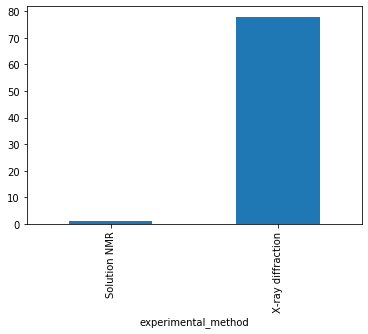

In [83]:
ds.plot(kind='bar')

We will make this into two functions so we can resue them

In [84]:
def pandas_count(list_of_results, column_to_group_by):
    df = pandas_dataset(list_of_results)
    ds = df.groupby(column_to_group_by)['pdb_id'].nunique()
    return ds
    
def pandas_plot(list_of_results, column_to_group_by, graph_type='bar'):
    ds = pandas_count(list_of_results=list_of_results, column_to_group_by=column_to_group_by)
    ds.plot(kind=graph_type)


One for counting the results

In [85]:
pandas_count(list_of_results=results, column_to_group_by='experimental_method')

experimental_method
Solution NMR          1
X-ray diffraction    78
Name: pdb_id, dtype: int64

and one for plotting the results

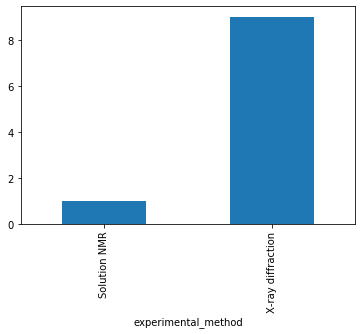

In [61]:
pandas_plot(list_of_results=results, column_to_group_by='experimental_method')

Remember this only searched through the first 10 results.
To increase the number of entries we have to run the search again, this time setting number_of_rows to a number in the function run_search. 

In [74]:
search_terms = {"molecule_name":"Dihydrofolate reductase",
                "organism_name":"Human"
               } 
results = run_search(search_terms, number_of_rows=10000)


https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:"Dihydrofolate reductase" AND organism_name:Human&wt=json&rows=10000


Then we can count the results using our pandas function above

In [86]:
pandas_count(list_of_results=results, column_to_group_by='experimental_method')

experimental_method
Solution NMR          1
X-ray diffraction    78
Name: pdb_id, dtype: int64

Changing the result so it groups by release year of the PDB entries. 

In [87]:
pandas_count(list_of_results=results, column_to_group_by='release_year')

release_year
1990     2
1992     1
1995     2
1998     6
2002     2
2003     5
2004     3
2005     3
2007     2
2009    13
2010     7
2011     7
2012     1
2013     8
2014     1
2015     2
2017    10
2018     2
2019     2
Name: pdb_id, dtype: int64

And then plot the number of entries released per year

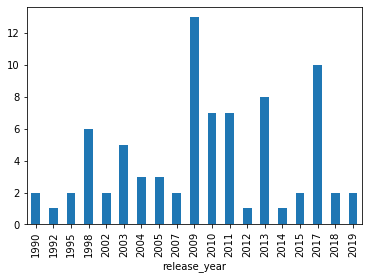

In [77]:
pandas_plot(list_of_results=results, column_to_group_by='release_year')

We can make this into a line graph 

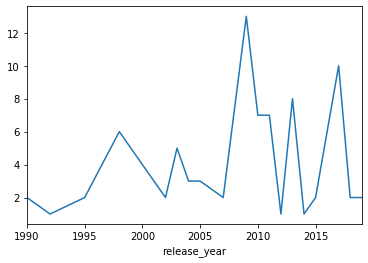

In [88]:
pandas_plot(list_of_results=results, column_to_group_by='release_year', graph_type='line')

Try changing the term you want to search for and see if you get interesting results.

## 7) searching for two terms at once

It would be interesting to see how many PDB entries were solved by each experimental method per year. 

we can use the tag "release_year" to get the year of release of each entry

We have to define a new function to group entries by two terms.

When we do the search we have to filter the results by the terms we want to plot otherwise it takes too long to run. 

In [89]:
search_terms = {"all_enzyme_names":"Lysozyme",
               } 
filter_results = ['beam_source_name','release_year', 'pdb_id']
results = run_search(search_terms, filter_results, number_of_rows=10000)

https://www.ebi.ac.uk/pdbe/search/pdb/select?q=all_enzyme_names:Lysozyme&fl=beam_source_name,release_year,pdb_id&wt=json&rows=10000


This will take a while as it will return lots of results. 
We can then define a function to group the results by two terms. 

In [90]:
def panda_multigroupby(results, first_column_to_group_by, second_column_to_group_by, graph_type='line'):
    
    df = pandas_dataset(results)
    new_df = df.groupby([first_column_to_group_by, second_column_to_group_by])
    ds = new_df.count().unstack().reset_index(first_column_to_group_by)
    ds.plot(x=first_column_to_group_by, y=pkind=graph_type, figsize=(15,15))

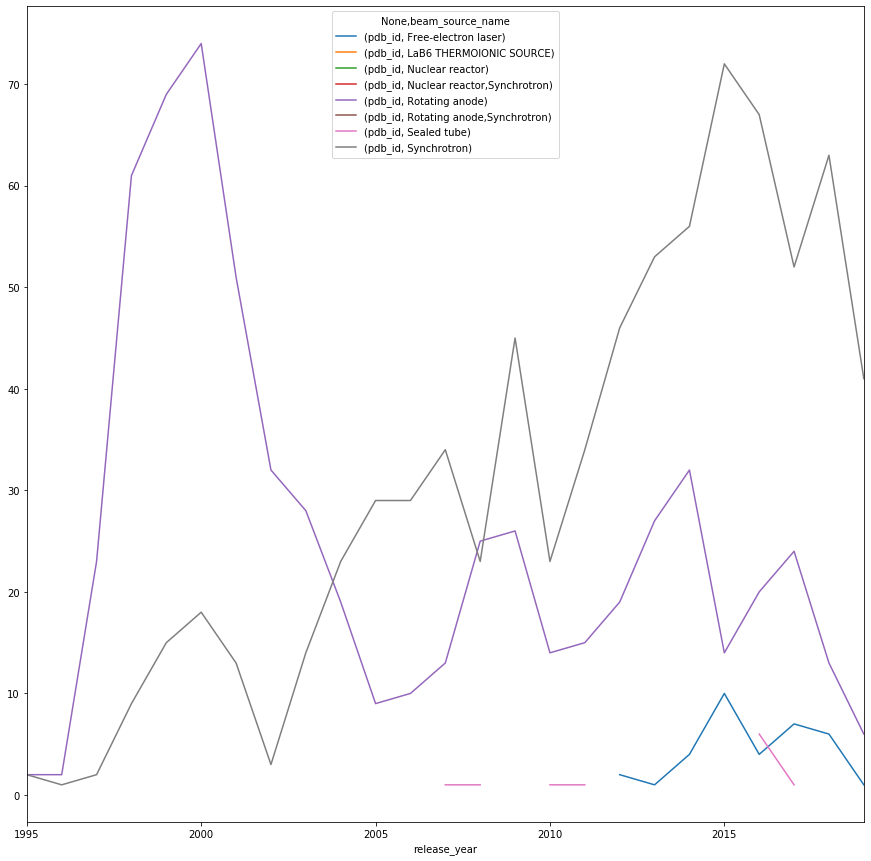

In [91]:
panda_multigroupby(results, 'release_year', 'beam_source_name')

This shows us that rotating anodes were used as the major source of radiation until around 2004 when Synchrotron's overtook as the major source of radiation. 

Try editing the queries to plot interesting trends within the PDB